# Advent of Code 2022

In [4]:
import re
from collections import Counter, defaultdict, deque
from itertools import zip_longest, cycle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sympy
import math
from IPython import display

### Table of Contents
- [Day 01: Calorie Counting](#day1)
- [Day 02: Rock Paper Scissors](#day2)
- [Day 03: Rucksack Organization](#day3)
- [Day 04: Camp Cleanup](#day4)
- [Day 05: Supply Stacks](#day5)
- [Day 06: Tuning Trouble](#day6)
- [Day 07: No Space Left On Device](#day7)
- [Day 08: Treetop Tree House](#day8)
- [Day 09: Rope Bridge](#day9)
- [Day 10: Cathode-Ray Tube](#day10)
- [Day 11: Monkey in the Middle](#day11)
- [Day 12: Hill Climbing Algorithm](#day12)
- [Day 13: Distress Signal](#day13)
- [Day 14: Regolith Reservoir](#day14)
- [Day 15: Beacon Exclusion Zone](#day15)
- [Day 16: Proboscidea Volcanium](#day16)
- [Day 17: Pyroclastic Flow](#day17)
- [Day 18: Boiling Boulders](#day18)
- [Day 19: Not Enough Minerals](#day19)
- [Day 20: Grove Positioning System](#day20)
- [Day 21: Monkey Math](#day21)
- [Day 22: Monkey Map](#day22)
- [Day 23: Unstable Diffusion](#day23)
- [Day 24: Blizzard Basin](#day24)
- [Day 25: Full of Hot Air](#day25)
- [Final Words](#recap)

---

<a id='day1'><a/>

## --- Day 1: Calorie Counting ---

##### Part 1:

In [ ]:
def parse_input(puzzle_input):
    """
    Parse input as a list of lists (list of elves, each elf represented by a list of food)
    """
    with open(puzzle_input) as file:
        text = file.read()
        lines = text.splitlines()

    elves_list = []
    food_list = []
    for food in lines:
        if food:
            food_list.append(int(food))
        else:
            elves_list.append(food_list)
            food_list = []
    elves_list.append(food_list) # adding last item
    return elves_list

In [1]:
def find_max_calories(puzzle_input):
    elves_list = parse_input(puzzle_input)
    return max([sum(elve) for elve in elves_list])

In [2]:
find_max_calories('data/day01_example')
find_max_calories('data/day01')

24000

66306

##### Part 2:

In [3]:
def find_top3_calories(puzzle_input):
    elves_list = parse_input(puzzle_input)
    return sum(sorted([sum(elve) for elve in elves_list])[-3:])

In [4]:
find_top3_calories('data/day01_example')
find_top3_calories('data/day01')

45000

195292

---

<a id='day2'><a/>

## --- Day 2: Rock Paper Scissors ---

##### Part 1:

Rock (A X), Paper (B Y), Scissors (C Z)<br>
Rock wins Scissors:   A->C<br>
Scissors wins Paper:  C->B<br>
Paper wins Rock:      B->A<br>

In [20]:
def solve_puzzle(puzzle_input, POINTS):
    
    with open(puzzle_input) as file:
        text = file.read()
        rounds = text.splitlines()

    return sum([POINTS[_round] for _round in rounds])

In [21]:
POINTS_PART_1 = {
    'A X': 1+3, # rocks draw
    'B X': 1+0, # rock beaten by paper
    'C X': 1+6, # rock beats scissors
    'A Y': 2+6, # paper beats rock
    'B Y': 2+3, # papers draw
    'C Y': 2+0, # paper beaten by scissors
    'A Z': 3+0, # scissor beaten by rock
    'B Z': 3+6, # scissor beats paper
    'C Z': 3+3  # scissors draw
}

solve_puzzle('data/day02_example', POINTS_PART_1)
solve_puzzle('data/day02', POINTS_PART_1)

15

13052

##### Part 2:

In [22]:
POINTS_PART_2 = {
    'A X': 3+0, # rock-loose -> scissor
    'B X': 1+0, # paper-loose -> rock
    'C X': 2+0, # scissor-lose -> paper
    'A Y': 1+3, # rock-draw -> rock
    'B Y': 2+3, # paper-draw -> paper
    'C Y': 3+3, # scissors-draw -> scissors
    'A Z': 2+6, # rock-win -> paper
    'B Z': 3+6, # paper-win -> scissors
    'C Z': 1+6  # scissors-win -> rock
}

solve_puzzle('data/day02_example', POINTS_PART_2)
solve_puzzle('data/day02', POINTS_PART_2)

12

13693

---

<a id='day3'><a/>

## --- Day 3: Rucksack Organization ---

##### Part 1:

In [26]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        text = file.read()
        return text.splitlines()

    
def split_compartments(items):
    compartment_1, compartment_2 = items[:len(items)//2], items[len(items)//2:]
    return compartment_1, compartment_2


def get_common_item(compartment_1, compartment_2):
    for ch in compartment_1:
        if ch in compartment_2:
            return ch
        
        
def get_priority(ch):
    if ch.islower():
        return ord(ch) - 96
    else:
        return ord(ch) - 38

    
def solve_rucksack(items):
    common_item = get_common_item(*split_compartments(items))
    return get_priority(common_item)


def solve_puzzle_1(puzzle_input):
    rucksacks = parse_input(puzzle_input)
    return sum([solve_rucksack(rucksack) for rucksack in rucksacks])

In [27]:
solve_puzzle_1('data/day03_example')
solve_puzzle_1('data/day03')

157

7845

##### Part 2:

Different approach using Sets and Counter

In [28]:
def get_common_item(rucksacks):
    set_of_items = []
    for rucksack in rucksacks:
        set_of_items += list(set(rucksack))
    counter = Counter(set_of_items)
    return counter.most_common(1)[0][0]


def rucksack_grouper(rucksacks, size):
    return (rucksacks[pos:pos + size] for pos in range(0, len(rucksacks), size))


def solve_puzzle_2(puzzle_input):
    rucksacks = parse_input(puzzle_input)
    groups = rucksack_grouper(rucksacks, 3)
    badges = [get_common_item(group) for group in groups]
    return sum(get_priority(badge) for badge in badges)

In [29]:
solve_puzzle_2('data/day03_example')
solve_puzzle_2('data/day03')

70

2790

---

<a id='day4'><a/>

## --- Day 4: Camp Cleanup ---

##### Part 1:

In [5]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        text = file.read()
        pairs = text.splitlines()
        pairs = [pair.split(',') for pair in pairs]
    return pairs
    

def parse_ids(s):
    """
    converts string '2-5' in list [2,5]
    """
    return [int(item) for item in s.split('-')]


def solve_puzzle_1(puzzle_input):
    pairs = parse_input(puzzle_input)
    full_overlapping_pairs = 0
    for pair in pairs:
        elf_1, elf_2 = (parse_ids(elf_ids) for elf_ids in pair)
        # 1 contains 2
        condition1 = elf_1[0] <= elf_2[0] and elf_1[1] >= elf_2[1]
        # 2 contains 1
        condition2 = elf_2[0] <= elf_1[0] and elf_2[1] >= elf_1[1]
        if (condition1 or condition2):
            full_overlapping_pairs += 1

    return full_overlapping_pairs    

In [6]:
solve_puzzle_1('data/day04_example')
solve_puzzle_1('data/day04')

2

459

##### Part 2:

In [7]:
def solve_puzzle_2(puzzle_input):
    pairs = parse_input(puzzle_input)
    overlapping_pairs = 0
    for pair in pairs:
        elf_1, elf_2 = (parse_ids(elf_ids) for elf_ids in pair)
        # 1 over 2
        condition1 = elf_1[1] >= elf_2[0] and elf_1[0] <= elf_2[1]
        # 2 over 1
        condition2 = elf_2[1] <= elf_1[0] and elf_2[0] >= elf_1[1]
        if (condition1 or condition2):
            overlapping_pairs += 1

    return overlapping_pairs    

In [8]:
solve_puzzle_2('data/day04_example')
solve_puzzle_2('data/day04')

4

779

---

<a id='day5'><a/>

## --- Day 5: Supply Stacks ---

##### Part 1:

In [74]:
def parse_stacks(puzzle_input):
    """
    Parses the first part of the puzzle involving initial state of crates
    """
    with open(puzzle_input) as file:
        text = file.read()
        lines = text.splitlines()

    stack_lines = lines[:lines.index('')]
    stack_lines = stack_lines[::-1]

    num_stacks = int(stack_lines[0].strip()[-1])

    stacks = {i+1: [] for i in range(num_stacks)}
    positions = [1+4*i for i in range(num_stacks)]

    for line in stack_lines[1:]:
        for stack_num, pos in enumerate(positions):
            if line[pos].isupper():
                value = line[pos]
                stacks[stack_num+1].append(value)            

    return stacks


def parse_steps(puzzle_input):
    """
    Parses the second part of the puzzle involving the steps the crane has to do
    """
    with open(puzzle_input) as file:
        text = file.read()
        lines = text.splitlines()

    step_lines = lines[lines.index('')+1:]

    steps = [[int(item) for item in step.split(' ')[1::2]] for step in step_lines]
    steps = [{'num': step[0], 'from': step[1], 'to': step[2]} for step in steps]
    return steps


def process_step(stacks, step):
    """
    Given a stacks state, process one single step and return back the new stacks state.
    The crates are moved one by one from one pile to another
    """
    for i in range(step['num']):
        crate = stacks[step['from']].pop()
        stacks[step['to']].append(crate)
    return stacks


def rearrange_crates(stacks, steps):
    """
    Compute a sort of steps. Returns the final state of stacks
    """
    for step in steps:
        stacks = process_step(stacks, step)
    return stacks


def get_last_crate_of_each_stack(stacks):
    result = ''
    for number in stacks:
        result += stacks[number].pop()
    return result


def solve_puzzle(puzzle_input):
    stacks = parse_stacks(puzzle_input)
    steps = parse_steps(puzzle_input)
    stacks = rearrange_crates(stacks, steps)
    return get_last_crate_of_each_stack(stacks)

In [75]:
solve_puzzle('data/day05_example')
solve_puzzle('data/day05')

'CMZ'

'ZWHVFWQWW'

##### Part 2:

We only need to redefine the `process_step()` function

In [76]:
def process_step(stacks, step):
    """
    Given a stacks state, process one single step and return back the new stacks state.
    This time, several crates can be moved at once from one pile to another
    """
    crates_to_move = stacks[step['from']][-step['num']:]
    stacks[step['from']] = stacks[step['from']][:-step['num']]
    stacks[step['to']] += crates_to_move
    return stacks

In [77]:
solve_puzzle('data/day05_example')
solve_puzzle('data/day05')

'MCD'

'HZFZCCWWV'

---

<a id='day6'><a/>

## --- Day 6: Tuning Trouble ---

##### Part 1:

In [1]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        return file.read()

def get_start_of_sequence(buffer, number):
    for i in range(len(buffer)-number-1):
        seq = buffer[i:i+number]
        if len(set(seq)) == number:
            return i + number
        
def solve_puzzle_1(puzzle_input):
    buffer = parse_input(puzzle_input)
    return get_start_of_sequence(buffer, 4)

In [2]:
# examples
SEQUENCE_LENGTH = 4
get_start_of_sequence('mjqjpqmgbljsphdztnvjfqwrcgsmlb', SEQUENCE_LENGTH)
get_start_of_sequence('bvwbjplbgvbhsrlpgdmjqwftvncz', SEQUENCE_LENGTH)
get_start_of_sequence('nppdvjthqldpwncqszvftbrmjlhg', SEQUENCE_LENGTH)
get_start_of_sequence('nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg', SEQUENCE_LENGTH)
get_start_of_sequence('zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw', SEQUENCE_LENGTH)

7

5

6

10

11

In [3]:
solve_puzzle_1('data/day06')

1702

##### Part 2:

In [4]:
# examples
SEQUENCE_LENGTH = 14
get_start_of_sequence('mjqjpqmgbljsphdztnvjfqwrcgsmlb', SEQUENCE_LENGTH)
get_start_of_sequence('bvwbjplbgvbhsrlpgdmjqwftvncz', SEQUENCE_LENGTH)
get_start_of_sequence('nppdvjthqldpwncqszvftbrmjlhg', SEQUENCE_LENGTH)
get_start_of_sequence('nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg', SEQUENCE_LENGTH)
get_start_of_sequence('zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw', SEQUENCE_LENGTH)

19

23

23

29

26

In [5]:
def solve_puzzle_2(puzzle_input):
    buffer = parse_input(puzzle_input)
    return get_start_of_sequence(buffer, 14)

In [6]:
solve_puzzle_2('data/day06')

3559

---

<a id='day7'><a/>

## --- Day 7: No Space Left On Device ---

##### Part 1:

In [1]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        return file.read().splitlines()
    

def get_value_from_keys_list(d, keys_list):
    """
    Given an arbitrary number of keys list and a dictionary, the value of the corresponding level is returned.
    Example: keys_list = ['a', 'b', 'c'] will return the value stored in d['a']['b']['c']
    """
    for key in keys_list:
        d = d[key]
    return d


def build_tree(lines): 
    """
    build a tree of directories in dict format. A directory may or not have a key 'size' that store the total size
    of the files directly contained in that directory (don't include subfolders) 
    """
    tree = {}
    tree['/'] = {}
    tree['/']['size'] = 0
    
    for line in lines:
        # change directory
        if line.startswith('$ cd'):
            subdir = line[5:]
            if subdir == '/':
                cwd = ['/']
            elif subdir == '..':
                cwd = cwd[:-1]
            else:
                cwd.append(subdir)
        # list files (do nothing)
        elif line == '$ ls':
            continue
        # dir or file
        else:
            current_dict = get_value_from_keys_list(tree, cwd)
            # dir
            if line.startswith('dir'):
                current_dict[line[4:]] = {}
                current_dict[line[4:]]['size'] = 0
            # file
            else:
                current_dict['size'] += int(line.split(' ')[0])
        
    return tree


def get_folder_sizes(tree, folder):
    """
    Recurrent function to calculate the size of a folder including all
    files in subfolders. 
    
    The important thing here is the global variable folder_list, where
    all values for each folder are stored    
    """
    
    global folder_list
    size = tree[folder]['size']
    subfolders = list(set(tree[folder].keys()) - set(['size']))
    for subfolder in subfolders:
        size += get_folder_sizes(tree[folder], subfolder)
    folder_list.append({folder: size})
    return size


def solve_puzzle_1(puzzle_input):

    lines = parse_input(puzzle_input)
    tree = build_tree(lines)
    global folder_list
    
    _ = get_folder_sizes(tree, '/')
        
    result = 0
    for folder in folder_list:
        folder_size = list(folder.values())[0]
        if folder_size < 100000:
            result += folder_size
    return result

In [2]:
folder_list = []
solve_puzzle_1('data/day07_example')

95437

In [3]:
folder_list = []
solve_puzzle_1('data/day07')

1915606

##### Part 2:

In [4]:
def solve_puzzle_2(puzzle_input):
    
    global folder_list
    solve_puzzle_1(puzzle_input)   # get folder_list
    
    for folder in folder_list:
        if '/' in folder.keys():
            used_space = list(folder.values())[0]
            
    current_unused_space = 70000000 - used_space
    space_to_free_up = 30000000 - current_unused_space
    
    folder_sizes = [list(folder.values())[0] for folder in folder_list]
    candidates_to_delete = [size for size in folder_sizes if size > space_to_free_up]
    folder_to_delete = sorted(candidates_to_delete)[0]
    return folder_to_delete

In [5]:
folder_list = []
solve_puzzle_2('data/day07_example')

24933642

In [6]:
folder_list = []
solve_puzzle_2('data/day07')

5025657

---

<a id='day8'><a/>

## --- Day 8: Treetop Tree House ---

##### Part 1:

In [52]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    lines = [[ch for ch in line] for line in lines]
    return np.array(lines, dtype=int)


def is_visible(forest, row, column):
    """
    Check if a Tree (given its row and column coordinates) 
    is visible from any of the four edges of the forest
    """
    w, h = forest.shape
    if row == 0 or row == h-1 or column == 0 or column == w-1:  # is edge
        return True
    else:
        tree_height = forest[row,column]
        is_visible_from_left = forest[row,:column].max() < tree_height
        is_visible_from_right = forest[row, column+1:].max() < tree_height
        is_visible_from_up = forest[:row, column].max() < tree_height
        is_visible_from_down = forest[row+1:, column].max() < tree_height

        is_visible = is_visible_from_left or is_visible_from_right or is_visible_from_up or is_visible_from_down
        return is_visible
    
    
    
def solve_puzzle_1(puzzle_input):
    
    forest = parse_input(puzzle_input)
    
    w, h = forest.shape
    
    number_visible = 0
    for row in range(h):
        for column in range(w):
            number_visible += is_visible(forest, row, column)

    return number_visible

In [53]:
solve_puzzle_1('data/day08_example')

21

In [50]:
solve_puzzle_1('data/day08')

1698

##### Part 2:

In [81]:
def get_scenic_score(forest, row, column):
    """
    Calculates the scenic score of a Tree (given its row and column coordinates).
    It's the multiplication of the number of trees seen from the own tree in the 4 possible directions
    """
    w, h = forest.shape
    if row == 0 or row == h-1 or column == 0 or column == w-1:  # is edge
        return 0
    else:
        tree_height = forest[row,column]
        is_visible_from_left = forest[row,:column].max() < tree_height
        is_visible_from_right = forest[row, column+1:].max() < tree_height
        is_visible_from_up = forest[:row, column].max() < tree_height
        is_visible_from_down = forest[row+1:, column].max() < tree_height
        
        if is_visible_from_left:
            score_left = column
        else:
            score_left = column - np.where(forest[row,:column] >= tree_height)[0].max()
            
        if is_visible_from_right:
            score_right = w-1 - column
        else:
            score_right = 1 + np.where(forest[row,column+1:] >= tree_height)[0].min()
            
        if is_visible_from_up:
            score_up = row
        else:
            score_up = row - np.where(forest[:row,column] >= tree_height)[0].max()

        if is_visible_from_down:
            score_down = h-1 - row
        else:
            score_down = 1 + np.where(forest[row+1:,column] >= tree_height)[0].min()        
        
        return score_left * score_right * score_up * score_down
    
    
    
def solve_puzzle_2(puzzle_input):
    
    forest = parse_input(puzzle_input)
    
    w, h = forest.shape
    
    max_scenic_score = 0
    for row in range(h):
        for column in range(w):
            scenic_score = get_scenic_score(forest, row, column)
            if scenic_score > max_scenic_score:
                max_scenic_score = scenic_score

    return max_scenic_score

In [82]:
solve_puzzle_2('data/day08_example')

8

In [83]:
solve_puzzle_2('data/day08')

672280

---

<a id='day9'><a/>

## --- Day 9: Rope Bridge ---

##### Part 1:

In [5]:
class Knot:
    """
    Represents a knot. Basically a 2D Point
    """
    
    def __init__(self, x, y):
        self.x = x
        self.y = y

        
class Rope:
    """
    Represents a short Rope, formed by 2 knots that have always to be adjacent.
    Moving the head may or not result on moving the tail.
    """
    
    def __init__(self, init_x = 0, init_y = 0):
        
        self.head = Knot(init_x, init_y)
        self.tail = Knot(init_x, init_y)
    
    
    def set_head_position(self, x, y):
        self.head.x = x
        self.head.y = y
        
    
    def move_head(self, direction):
    
        # movements in 4 directions
        if direction == 'R':
            self.head.x += 1
            
        if direction == 'L':
            self.head.x -= 1
            
        if direction == 'U':
            self.head.y += 1
            
        if direction == 'D':
            self.head.y -= 1

        
    def move_tail(self):
        dif_x = self.head.x - self.tail.x
        dif_y = self.head.y - self.tail.y

        if np.abs(dif_x) == 2:
            self.tail.x = self.tail.x+1 if dif_x > 0 else self.tail.x-1
            if np.abs(dif_y) == 1:
                self.tail.y = self.tail.y+1 if dif_y > 0 else self.tail.y-1
        if np.abs(dif_y) == 2:
            self.tail.y = self.tail.y+1 if dif_y > 0 else self.tail.y-1
            if np.abs(dif_x) == 1:
                self.tail.x = self.tail.x+1 if dif_x > 0 else self.tail.x-1
                
                
    def __str__(self):
        return f'Head: ({self.head.x},{self.head.y}). Tail: ({self.tail.x},{self.tail.y})'
    
    
    
    
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
        return [move.split(' ') for move in lines]

    
def get_maximum_size(movements):
    """
    Estimates the maximum size of the board by adding all steps 
    in the same direction and keeping the maximum.
    """
    d = defaultdict(int)
    for direction, longitude in movements:
        d[direction] += int(longitude)

    return max(list(d.values()))


def solve_puzzle_1(puzzle_input):
    movements = parse_input(puzzle_input)
    max_size = get_maximum_size(movements)
    
    board = np.zeros((max_size,max_size), dtype=int)
    r = Rope()
    for direction, longitude in movements:
        for _ in range(int(longitude)):
            r.move_head(direction)
            r.move_tail()
            board[r.tail.x, r.tail.y] += 1

    return (board > 0).sum()

In [6]:
solve_puzzle_1('data/day09_example')

13

In [7]:
solve_puzzle_1('data/day09')

6175

##### Part 2:

In [8]:
class RopeSystem:
    """
    Representation of a rope system formed by a chain of 9 Rope, each tail is the head of the next rope
    """
    
    def __init__(self, init_x = 0, init_y = 0):
        self.ropes = [Rope(init_x, init_y) for _ in range(9)]
        self.head = self.ropes[0].head
        self.tail = self.ropes[8].tail
        
        
    def move_rope(self, direction):
        """
        the movement is passed to the head of the first Rope.
        The movement is propagated to the rest of ropes of the system.
        
        """
        self.ropes[0].move_head(direction)
        self.ropes[0].move_tail()
        
        for i in range(1,9):
            self.ropes[i].set_head_position(self.ropes[i-1].tail.x, self.ropes[i-1].tail.y)
            self.ropes[i].move_tail()

            
    def __str__(self):
        return f'Head: ({self.head.x},{self.head.y}). Tail: ({self.tail.x},{self.tail.y})'
            
        
def solve_puzzle_2(puzzle_input):
    movements = parse_input(puzzle_input)
    max_size = get_maximum_size(movements)
    
    board = np.zeros((max_size,max_size), dtype=int)
    r = RopeSystem()
    for direction, longitude in movements:
        for _ in range(int(longitude)):
            r.move_rope(direction)
            board[r.tail.x, r.tail.y] += 1

    return((board > 0).sum())

In [9]:
solve_puzzle_2('data/day09_example')

1

In [10]:
solve_puzzle_2('data/day09_example2')

36

In [11]:
solve_puzzle_2('data/day09')

2578

---

<a id='day10'><a/>

## --- Day 10: Cathode-Ray Tube ---

##### Part 1:

In [29]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        return file.read().splitlines()
    

def get_values_each_cycle(instructions):
    """
    Generates a list with the values at the end of each cycle.
    The value in the index i represents the value at the end of the cycle i.
    So the value DURING the cycle i is the value at index i-1
    """
    X = 1          # initial value
    values = [X]   # value during cycle 1 (index 0)

    for instruction in instructions:
        if instruction == 'noop':
            values.append(X) # 1 cycle doing nothing
        else:
            values.append(X) # 1 cycle doing nothing ...
            X += int(instruction.split(' ')[1])
            values.append(X) # .. updating value at the end of 2nd cycle
    
    return values
    
    
def solve_puzzle_1(puzzle_input):
    instructions = parse_input(puzzle_input)
    values = get_values_each_cycle(instructions)

    result = 0
    for cycle in [20, 60, 100, 140, 180, 220]:
        result += cycle*values[cycle-1]
    
    return result
    

In [30]:
solve_puzzle_1('data/day10_example')

13140

In [31]:
solve_puzzle_1('data/day10')

15260

##### Part 2:

In [102]:
def solve_puzzle_2(puzzle_input):
    
    instructions = parse_input(puzzle_input)
    values = get_values_each_cycle(instructions)
    
    values = np.array(values[:-1], dtype=int).reshape((6, -1))  # values of cycle in a screen 40x6
    cycles = np.array(range(240), dtype=int).reshape((6,-1))    # cycles in a screen 40x6
    cycles = cycles % 40                                        # reset cycles in each row
    lit_pixels = np.abs(values - cycles) <= 1                   # condition to lit the pixel
    
    # drawing stuff
    plt.imshow(lit_pixels)
    current_plot = plt.gca()
    current_plot.axes.get_xaxis().set_visible(False)
    current_plot.axes.get_yaxis().set_visible(False)

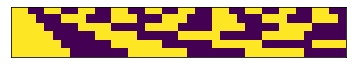

In [103]:
solve_puzzle_2('data/day10_example')

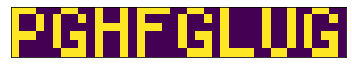

In [104]:
solve_puzzle_2('data/day10')

---

<a id='day11'><a/>

## --- Day 11: Monkey in the Middle ---

##### Part 1:

In [2]:
class Monkey:
    
    def __init__(self, _id, items, operation, divisible, if_true, if_false):
        
        self._id = _id
        self.items = items
        self.operation = operation
        self.divisible = divisible
        self.if_true = if_true
        self.if_false = if_false
        self.activity = 0

    
    def has_items_to_inspect(self):
        return len(self.items) > 0
    
    
    def inspect_item(self):
        """
        Inspects the first item in list, evaluates the worry level,
        and returns the monkey to throw the item
        """
        self.activity += 1
        worry_level = self.items[0]
        self.items = self.items[1:]
        
        operator = self.operation.split(' ')[0]
        value = self.operation.split(' ')[1]
        value = int(value) if value.isdigit() else worry_level
        worry_level = worry_level + value if operator == '+' else worry_level * value
        worry_level = worry_level // 3
        test = worry_level % self.divisible == 0
        if test:
            return (worry_level, self.if_true)
        else:
            return (worry_level, self.if_false)
        
        
    def receive_item(self, worry_level):
        self.items.append(worry_level)

        
    def __repr__(self):
        return f'Monkey {self._id}: {self.items}'

In [3]:
def process(line):
    """
    Process a single line extracting the values that matters in each case
    """
    if line.startswith('Monkey'):
        return int(line[7:-1])
    elif line.strip().startswith('Start'):
        items = line[18:].split(',')
        return [int(item) for item in items]
    elif line.strip().startswith('Operation'):
        return line[23:]
    elif line.strip().startswith('Test'):
        return int(line[21:])
    elif line.strip().startswith('If true'):
        return int(line[29:])
    elif line.strip().startswith('If false'):
        return int(line[30:])
    else:
        raise ValueError

        
def parse_input(puzzle_input):
    """
    Returns a list of object Monkey with the initial state
    """
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    monkeys = [] # list of Monkey
    monkey = []  # lines corresponding to 1 monkey
    for line in lines:
        if line == '': # finish a monkey
            monkey = Monkey(*monkey)
            monkeys.append(monkey)     
            monkey = [] # reset to start with the next Monkey
        else:
            monkey.append(process(line))
    
    # last monkey:        
    monkey = Monkey(*monkey)
    monkeys.append(monkey)

    return monkeys


def process_turn(from_monkey):
    """
    Process a turn for a single monkey until the monkey has no items
    """
    while monkeys[from_monkey].has_items_to_inspect():
        worry_level, to_monkey = monkeys[from_monkey].inspect_item()
        monkeys[to_monkey].receive_item(worry_level)

        
def process_round(num_monkeys):
    """
    Process a complete round (one turn for each monkey)
    """
    global monkeys
    for i in range(num_monkeys):
        process_turn(i)

In [4]:
monkeys = parse_input('data/day11_example')
print(f'Initial state: {monkeys}')
num_monkeys = len(monkeys)
for i in range(20):
    process_round(num_monkeys)
    print(f'Round {i+1:2d}: {monkeys}')
monkey_business = np.prod(sorted([monkey.activity for monkey in monkeys])[-2:])
print(f'\nMonkey Business: {monkey_business}')

Initial state: [Monkey 0: [79, 98], Monkey 1: [54, 65, 75, 74], Monkey 2: [79, 60, 97], Monkey 3: [74]]
Round  1: [Monkey 0: [20, 23, 27, 26], Monkey 1: [2080, 25, 167, 207, 401, 1046], Monkey 2: [], Monkey 3: []]
Round  2: [Monkey 0: [695, 10, 71, 135, 350], Monkey 1: [43, 49, 58, 55, 362], Monkey 2: [], Monkey 3: []]
Round  3: [Monkey 0: [16, 18, 21, 20, 122], Monkey 1: [1468, 22, 150, 286, 739], Monkey 2: [], Monkey 3: []]
Round  4: [Monkey 0: [491, 9, 52, 97, 248, 34], Monkey 1: [39, 45, 43, 258], Monkey 2: [], Monkey 3: []]
Round  5: [Monkey 0: [15, 17, 16, 88, 1037], Monkey 1: [20, 110, 205, 524, 72], Monkey 2: [], Monkey 3: []]
Round  6: [Monkey 0: [8, 70, 176, 26, 34], Monkey 1: [481, 32, 36, 186, 2190], Monkey 2: [], Monkey 3: []]
Round  7: [Monkey 0: [162, 12, 14, 64, 732, 17], Monkey 1: [148, 372, 55, 72], Monkey 2: [], Monkey 3: []]
Round  8: [Monkey 0: [51, 126, 20, 26, 136], Monkey 1: [343, 26, 30, 1546, 36], Monkey 2: [], Monkey 3: []]
Round  9: [Monkey 0: [116, 10, 12, 

In [5]:
monkeys = parse_input('data/day11')
print(f'Initial state: {monkeys}')
num_monkeys = len(monkeys)
for i in range(20):
    process_round(num_monkeys)
#     print(f'Round {i+1:2d}: {monkeys}')
monkey_business = np.prod(sorted([monkey.activity for monkey in monkeys])[-2:])
print(f'\nMonkey Business: {monkey_business}')

Initial state: [Monkey 0: [99, 67, 92, 61, 83, 64, 98], Monkey 1: [78, 74, 88, 89, 50], Monkey 2: [98, 91], Monkey 3: [59, 72, 94, 91, 79, 88, 94, 51], Monkey 4: [95, 72, 78], Monkey 5: [76], Monkey 6: [69, 60, 53, 89, 71, 88], Monkey 7: [72, 54, 63, 80]]

Monkey Business: 120384


##### Part 2:

Key concept: "Worry level" of items passed through monkeys can be reduced by the modulo of the product of the divisible factors of all monkeys without affecting the final result

In [14]:
class SuperMonkey(Monkey):
    """      
    Difference with Monkey: worry levels are not divided by 3 anymore
    
    """
 
    def inspect_item(self):
        
        self.activity += 1
        worry_level = self.items[0]
        self.items = self.items[1:]
        
        operator = self.operation.split(' ')[0]
        value = self.operation.split(' ')[1]
        value = int(value) if value.isdigit() else worry_level
        worry_level = worry_level + value if operator == '+' else worry_level * value
#         worry_level = worry_level // 3
        test = worry_level % self.divisible == 0
        if test:
            return (worry_level, self.if_true)
        else:
            return (worry_level, self.if_false)

In [15]:
def parse_input(puzzle_input):
    """
    Returns a list of object SuperMonkey with the initial state
    """
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    monkeys = [] # list of Monkey
    monkey = []  # lines corresponding to 1 monkey
    for line in lines:
        if line == '': # finish a monkey
            monkey = SuperMonkey(*monkey)
            monkeys.append(monkey)     
            monkey = [] # reset to start with the next Monkey
        else:
            monkey.append(process(line))
    
    # last monkey:        
    monkey = SuperMonkey(*monkey)
    monkeys.append(monkey)

    return monkeys


def get_divisible_product(monkeys):
    """
    Returns the product of all divisible factors of monkeys
    """
    result = 1
    for monkey in monkeys:
        result *= monkey.divisible
    return result


def process_turn(from_monkey, divisible_product):
    """
    Process a turn for a single monkey until the monkey has no items.
    Worry level passed to another monkey can be safely reduced to the
    reminder of the product of the divisible factors
    """
    while monkeys[from_monkey].has_items_to_inspect():
        worry_level, to_monkey = monkeys[from_monkey].inspect_item()
        monkeys[to_monkey].receive_item(worry_level % divisible_product)

        
def process_round(num_monkeys):
    """
    Process a complete round (one turn for each monkey)
    """
    global monkeys
    divisible_product = get_divisible_product(monkeys)
    for i in range(num_monkeys):
        process_turn(i, divisible_product)
    
    
def get_state_after_round(monkeys):
    return [monkey.activity for monkey in monkeys]

In [16]:
monkeys = parse_input('data/day11_example')
print(f'Initial state: {monkeys}')
num_monkeys = len(monkeys)
for i in range(10000):
    process_round(num_monkeys)
    if i+1 in [1, 20, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
        state = get_state_after_round(monkeys)
        print(f'Round {i+1:5d}: {state}')

monkey_business = np.prod(sorted([monkey.activity for monkey in monkeys])[-2:])
print(f'\nMonkey Business: {monkey_business}')

Initial state: [Monkey 0: [79, 98], Monkey 1: [54, 65, 75, 74], Monkey 2: [79, 60, 97], Monkey 3: [74]]
Round     1: [2, 4, 3, 6]
Round    20: [99, 97, 8, 103]
Round  1000: [5204, 4792, 199, 5192]
Round  2000: [10419, 9577, 392, 10391]
Round  3000: [15638, 14358, 587, 15593]
Round  4000: [20858, 19138, 780, 20797]
Round  5000: [26075, 23921, 974, 26000]
Round  6000: [31294, 28702, 1165, 31204]
Round  7000: [36508, 33488, 1360, 36400]
Round  8000: [41728, 38268, 1553, 41606]
Round  9000: [46945, 43051, 1746, 46807]
Round 10000: [52166, 47830, 1938, 52013]

Monkey Business: 2713310158


In [17]:
monkeys = parse_input('data/day11')
print(f'Initial state: {monkeys}')
num_monkeys = len(monkeys)
for i in range(10000):
    process_round(num_monkeys)
    if i+1 in [1, 20, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
        state = get_state_after_round(monkeys)
        print(f'Round {i+1:5d}: {state}')

monkey_business = np.prod(sorted([monkey.activity for monkey in monkeys])[-2:])
print(f'\nMonkey Business: {monkey_business}')

Initial state: [Monkey 0: [99, 67, 92, 61, 83, 64, 98], Monkey 1: [78, 74, 88, 89, 50], Monkey 2: [98, 91], Monkey 3: [59, 72, 94, 91, 79, 88, 94, 51], Monkey 4: [95, 72, 78], Monkey 5: [76], Monkey 6: [69, 60, 53, 89, 71, 88], Monkey 7: [72, 54, 63, 80]]
Round     1: [7, 5, 8, 9, 8, 13, 18, 5]
Round    20: [43, 324, 328, 120, 324, 352, 341, 29]
Round  1000: [2032, 17309, 17275, 4581, 17874, 17807, 17413, 685]
Round  2000: [3997, 34694, 34560, 9082, 35849, 35658, 34822, 1301]
Round  3000: [5966, 52079, 51845, 13578, 53824, 53507, 52233, 1915]
Round  4000: [7939, 69463, 69130, 18079, 71799, 71358, 69642, 2531]
Round  5000: [9905, 86854, 86420, 22573, 89774, 89207, 87058, 3140]
Round  6000: [11874, 104240, 103707, 27071, 107749, 107058, 104469, 3754]
Round  7000: [13840, 121626, 120993, 31574, 125724, 124907, 121881, 4367]
Round  8000: [15806, 139009, 138276, 36081, 143699, 142758, 139288, 4985]
Round  9000: [17773, 156394, 155559, 40582, 161674, 160607, 156697, 5601]
Round 10000: [19740

---

<a id='day12'><a/>

## --- Day 12: Hill Climbing Algorithm ---

#### Dijkstra's Algorithm

Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a graph.<br>
https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

![Dijkstra Algorithm](images/Dijkstra_Animation.gif)

##### Part 1:

In [2]:
def parse_input(puzzle_input, draw_terrain=True):
    """
    Returns a 2D numpy array with a numeric representation of the altitude of a grid
    Also Returns the starting position and the ending position or summit.
    """
    
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    lines = [list(line) for line in lines]                              # split string in chars
    area = np.array([[ord(ch)-97 for ch in line] for line in lines])    # convert letters in numeric altitude
    
    # store starting_position and end_position (summit)
    # 'S' = -14 ; 'E' = -28
    starting_position = (np.where(area == -14)[0][0], np.where(area == -14)[1][0])
    summit = (np.where(area == -28)[0][0], np.where(area == -28)[1][0])

    # change start-end marks to its altitude
    area[np.where(area == -14)] = 0  # 'a'
    area[np.where(area == -28)] = 25 # 'z'
    
    # draw terrain
    if draw_terrain:
        plt.imshow(area, cmap='terrain');
    
    return area, starting_position, summit

In [3]:
class Position:
        
    """
    A class useful to simulate the edges of the graph.
    Given a Position, provides all the possible Positions where to go next
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.coords = (x, y)
        

    def go_left(self):
        return Position(self.x, self.y-1)
    
    def go_right(self):
        return Position(self.x, self.y+1)
    
    def go_up(self):
        return Position(self.x-1, self.y)
    
    def go_down(self):
        return Position(self.x+1, self.y)
    
    
    def get_positions_to_go(self, area):
        """
        It's only allowed to go to a place with a maximum of one unit higher
        than our current position
        """
        positions = []
        
        if self.y > 0 and area[self.x, self.y-1] <= area[self.x, self.y]+1:
            positions.append(self.go_left())
            
        if self.y < area.shape[1]-1 and area[self.x, self.y+1] <= area[self.x, self.y]+1:
            positions.append(self.go_right())        
        
        if self.x > 0 and area[self.x-1, self.y] <= area[self.x, self.y]+1:
            positions.append(self.go_up())
            
        if self.x < area.shape[0]-1 and area[self.x+1, self.y] <= area[self.x, self.y]+1:
            positions.append(self.go_down())
            
        return positions

        
    def __repr__(self):
        return f'(x={self.x}, y={self.y})'
    

#### Dikjstra Algorithm pseudocode:

- List all nodes and assign them a initial `distance_to_start` equal to **inf** and set a flag `visited` to **False**
- Assign to the starting node the value `distance_to_start` = 0
- Repeat until all nodes are visited:
    - Get the node NOT visited with the least `distance_to_start` (this will be the current_node)
    - Calculate the edges (possible nodes to go from the current_node)
    - For each possible nodes to go:
        - Calculate the estimated `distance_to_start` of that node (as a sum of the `distance_to_start` of the current node plus the distance of the edge, 1 in this puzzle). If is less than the value set before update it with the new value
    - Set the current_node value `visited`= True

In [4]:
def solve_puzzle_1(puzzle_input):

    area, starting_position, summit = parse_input(puzzle_input)
    
    # We build a data structure to keep track of the dijkstra's algorithm 
    # main concepts (distance_to_start and visited)
    data = []
    for x in range(area.shape[0]):
        for y in range(area.shape[1]):
            data.append([x,y, area[x,y], np.inf, False])

    df = pd.DataFrame(data, columns=['x','y','altitude','distance','visited'])
    df.set_index(['x', 'y'], inplace=True)
    
    # initialization of the algorithm. Starting position has distance 0 to the start
    df.loc[starting_position, 'distance'] = 0
    
    # while there are remaining nodes not visited
    while not all(df['visited']):

        # get the node not visited with the least distance:
        current_position = Position(*df[~df['visited']]['distance'].idxmin())
        current_distance = df[~df['visited']]['distance'].min()

        # get possible positions to go:
        possible_positions = current_position.get_positions_to_go(area)
        #For each possible node to go:
        for position in possible_positions:
            # If the estimated distance is less than the previous value, update it
            if current_distance + 1 < df.loc[position.coords, 'distance']:
                df.loc[position.coords, 'distance'] = current_distance + 1

        # Mark the node as visited
        df.loc[current_position.coords, 'visited'] = True

    return df.loc[summit]['distance']

31.0

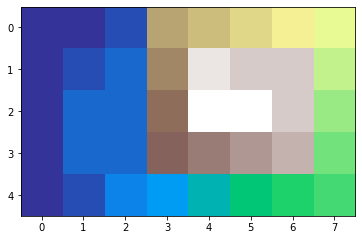

In [5]:
solve_puzzle_1('data/day12_example')

350.0

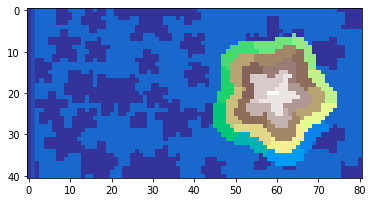

In [6]:
solve_puzzle_1('data/day12')

##### Part 2:

We will compute the same **Dijkstraa Algorithm** but this time starting from the summit and reversing the conditions of the edges. This time we can only go down by one unit or up.

The solution will the fewest distance to any Position with elevation 'a' (or 0)

In [7]:
class Position:
    """
    A class useful to simulate the edges of the graph.
    Given a Position, provides all the possible Positions to go next
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.coords = (x, y)
        

    def go_left(self):
        return Position(self.x, self.y-1)
    
    def go_right(self):
        return Position(self.x, self.y+1)
    
    def go_up(self):
        return Position(self.x-1, self.y)
    
    def go_down(self):
        return Position(self.x+1, self.y)
    
    
    def get_positions_to_go(self, area):
        """
        It's only allowed to go to a place with a maximum of one unit lower
        than our current position
        """
        positions = []
        
        if self.y > 0 and area[self.x, self.y-1] >= area[self.x, self.y]-1:
            positions.append(self.go_left())
            
        if self.y < area.shape[1]-1 and area[self.x, self.y+1] >= area[self.x, self.y]-1:
            positions.append(self.go_right())        
        
        if self.x > 0 and area[self.x-1, self.y] >= area[self.x, self.y]-1:
            positions.append(self.go_up())
            
        if self.x < area.shape[0]-1 and area[self.x+1, self.y] >= area[self.x, self.y]-1:
            positions.append(self.go_down())
            
        return positions

        
    def __repr__(self):
        return f'(x={self.x}, y={self.y})'
    

In [8]:
def solve_puzzle_2(puzzle_input):

    area, starting_position, summit = parse_input(puzzle_input)
    
    # We build a data structure to keep track of the djikstra algorithm 
    # main concepts (distance_to_start and visited)
    data = []
    for x in range(area.shape[0]):
        for y in range(area.shape[1]):
            data.append([x,y, area[x,y], np.inf, False])

    df = pd.DataFrame(data, columns=['x','y','altitude','distance','visited'])
    df.set_index(['x', 'y'], inplace=True)
    
    # initialization of the algorithm. Starting position now is the summit
    df.loc[summit, 'distance'] = 0
    
    # while there are remaining nodes not visited    
    while not all(df['visited']):

        # get the node not visited with the least distance:
        current_position = Position(*df[~df['visited']]['distance'].idxmin())
        current_distance = df[~df['visited']]['distance'].min()

        # get possible positions to go:
        possible_positions = current_position.get_positions_to_go(area)
        #For each possible node to go:
        for position in possible_positions:
            # If the estimated distance is less than the previous value, update it
            if current_distance + 1 < df.loc[position.coords, 'distance']:
                df.loc[position.coords, 'distance'] = current_distance + 1

        # Mark the node as visited
        df.loc[current_position.coords, 'visited'] = True

    return df[df['altitude']==0]['distance'].min()

29.0

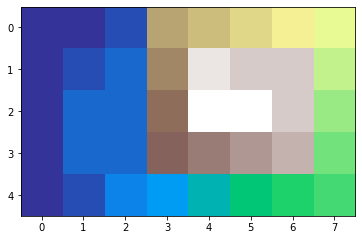

In [9]:
solve_puzzle_2('data/day12_example')

349.0

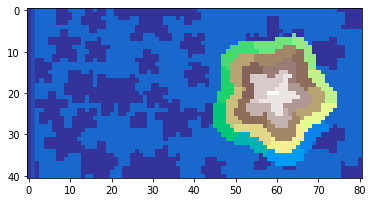

In [10]:
solve_puzzle_2('data/day12')

---

<a id='day13'><a/>

## --- Day 13: Distress Signal ---

##### Part 1:

In [5]:
def parse_input(puzzle_input):
    
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    
    pairs = defaultdict(dict)
    for idx, line in enumerate(lines):
        if idx%3 == 0:
            side = 'left'
            pairs[idx//3 + 1][side] = eval(line)
        elif idx%3 == 1:
            side = 'right'
            pairs[idx//3 + 1][side] = eval(line)
    
    return pairs


def are_in_right_order(p1, p2):
    """
    Evaluates if p1 < p2, according to the rules of the puzzle, using recursion
    """
    # To manage lists that run out of items (base case)
    if p1 is None:
        return True
    
    if p2 is None:
        return False
    
    # if both comparators are ints (base case)
    if isinstance(p1, int) and isinstance(p2, int):
        if p1 != p2:
            return p1 < p2
    
    # manage situations of comparing ints and lists. Convert int to list and continue
    if isinstance(p1, int) and isinstance(p2, list):
        p1 = [p1]
        
    if isinstance(p1, list) and isinstance(p2, int):
        p2 = [p2]
        
    # recursion for the pairing items of both lists
    # if a base case is reaches return, otherwise continue
    if isinstance(p1, list) and isinstance(p2, list):
        for sub_p1, sub_p2 in zip_longest(p1, p2):
            result = are_in_right_order(sub_p1, sub_p2)
            if result is not None:
                return result

            
def solve_puzzle_1(puzzle_input):
    
    pairs = parse_input(puzzle_input)
    
    right_pairs_indices_sum = 0
    for idx, pair in pairs.items():
        if are_in_right_order(pair['left'], pair['right']):
            right_pairs_indices_sum += idx
    return right_pairs_indices_sum

In [6]:
solve_puzzle_1('data/day13_example')

13

In [7]:
solve_puzzle_1('data/day13')

6420

##### Part 2:

Sort all packets. Plus additional divider packets

In [8]:
def parse_input(puzzle_input):
    
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    
    packets = []
    for line in lines:
        if line != '':
            packets.append(eval(line))
    
    return packets

In [9]:
def solve_puzzle_2(puzzle_input):
    
    packets = parse_input(puzzle_input)
    divider_1 = [[2]]
    divider_2 = [[6]]
    packets += [divider_1, divider_2]

    # insert sorting algorithm
    ordered_list = []
    num_iterations = len(packets)

    for _ in range(num_iterations):

        min_idx = 0
        for i in range(len(packets)):
            if are_in_right_order(packets[i], packets[min_idx]):
                min_idx = i
        ordered_list.append(packets[min_idx])
        del packets[min_idx]


    divider_position_1 = ordered_list.index(divider_1) + 1
    divider_position_2 = ordered_list.index(divider_2) + 1
    return divider_position_1 * divider_position_2

In [10]:
solve_puzzle_2('data/day13_example')

140

In [11]:
solve_puzzle_2('data/day13')

22000

---

<a id='day14'><a/>

## --- Day 14: Regolith Reservoir ---

##### Part 1:

In [2]:
def parse_input(puzzle_input):

    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    return [[eval(s) for s in line.split(' -> ')] for line in lines]


def create_cave_contours(lines):
    """
    Returns a numpy array with the right size to fit all the rocks.
    Horizontal size is enought to leave one blank space in each side
    Vertical size includes one extra space below the cave.
    
    Returns also the x_shift
    
    Note: to draw correctly the cave the coordinates have to be written (y, x)
    """
    
    flatten_lines = [item for sublist in lines for item in sublist]
    x_coords = [item[0] for item in flatten_lines]
    x_limits = min(x_coords), max(x_coords)
    y_coords = [item[1] for item in flatten_lines]
    y_limits = min(y_coords), max(y_coords)
    
    x_shift = x_limits[0] - 1
    
    return np.zeros((y_limits[1] + 2, x_limits[1] - x_shift + 2), dtype=int), x_shift


def fill_cave_with_rocks(cave, x_shift, lines):
    
    for line in lines:
        for pair in zip(line[:-1], line[1:]):

            x = [point[0] for point in pair]
            y = [point[1] for point in pair]

            cave[min(y): max(y)+1, min(x)-x_shift: max(x)-x_shift+1] = 1
    
    return cave

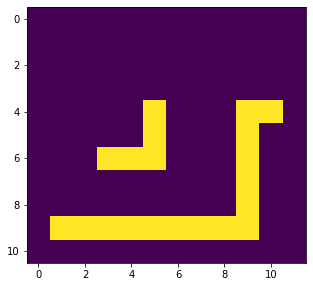

In [3]:
# let's see how the cave looks like
lines = parse_input('data/day14_example')
cave, x_shift =  create_cave_contours(lines)
cave = fill_cave_with_rocks(cave, x_shift, lines)

plt.rcParams["figure.figsize"] = [5, 5]
plt.imshow(cave, aspect=1);

Codes used in the cave array representation
- 0: air
- 1: rock
- 2: sand rest
- 1: sand out

In [4]:
class Sand:
    
    def __init__(self, y, x):
        self.y = y
        self.x = x
        self.status = 'moving'
        
    def fall_one_step(self, cave):
        
        if cave[self.y+1, self.x] == 0:
            self.y += 1
            
        elif cave[self.y+1, self.x-1] == 0:
            self.y += 1
            self.x -= 1
            
        elif cave[self.y+1, self.x+1] == 0:
            self.y += 1
            self.x += 1
            
        else:
            self.status = 'rest'
            return False
            
        if self.y == cave.shape[0]-1:
            self.status = 'out'
            return False
        else:
            return True
        
    
    def fall(self, cave):
        
        continue_falling = True
        while continue_falling:
            continue_falling = self.fall_one_step(cave)
            
        if self.status == 'rest':
            cave[self.y, self.x] = 2
            
        elif self.status == 'out':
            cave[self.y, self.x] = 1          
            
        return cave

In [5]:
def solve_puzzle_1(puzzle_input, plot=True, plot_animation=False, figsize=[5,5]):
    lines = parse_input(puzzle_input)
    cave, x_shift =  create_cave_contours(lines)
    cave = fill_cave_with_rocks(cave, x_shift, lines)
    starting_point = (0, 500 - x_shift)
    
    plt.rcParams["figure.figsize"] = figsize

    while cave[-1].sum() == 0:  # no sand out of cave
        sand = Sand(starting_point[0], starting_point[1])
        cave = sand.fall(cave)
    
        if plot_animation:
            plt.imshow(cave);
            display.clear_output(wait=True);
            display.display(plt.gcf());

    sand_rest = (cave == 2).sum()
    display.clear_output(wait=True);
    if plot:
        plt.imshow(cave);
    print(f'Units of sand rest: {sand_rest}');

Units of sand rest: 24


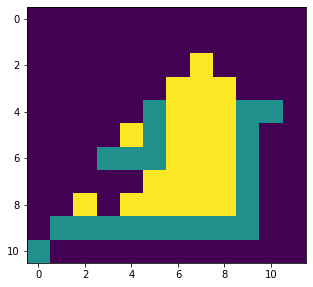

In [6]:
solve_puzzle_1('data/day14_example', plot_animation=True)

Units of sand rest: 825


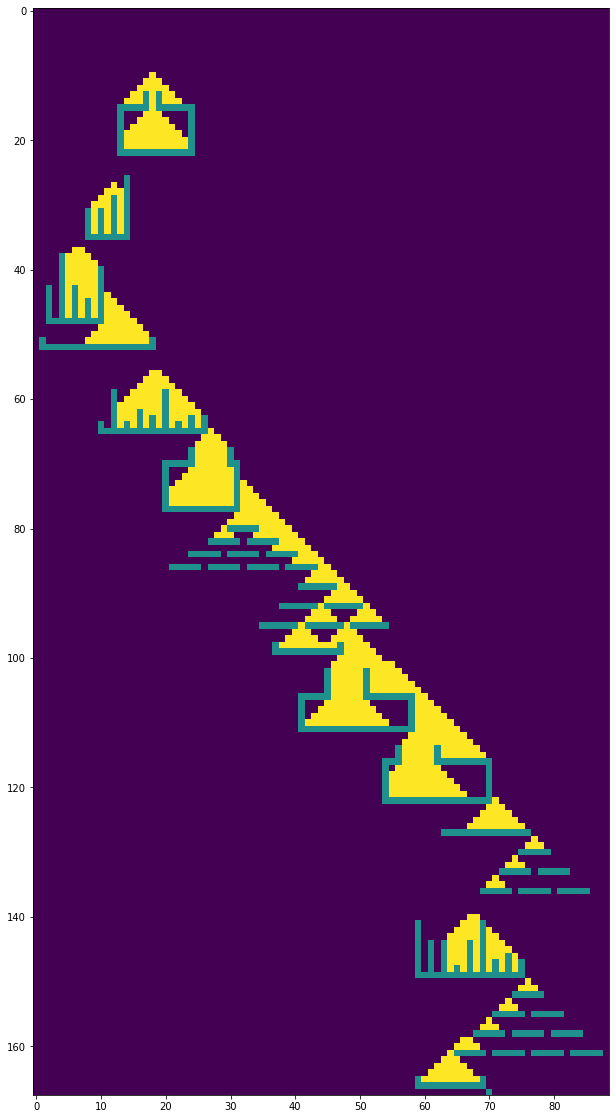

In [7]:
solve_puzzle_1('data/day14', plot=True, figsize=[20,20])

##### Part 2:

Differences from Part 1:
- Anticipate an extra space in each side to fit the sand
- There is a floor of rock two units below the bottom
- Finish condition modified: starting point is blocked by sand

In [8]:
def parse_input(puzzle_input):

    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    return [[eval(s) for s in line.split(' -> ')] for line in lines]


def create_cave_contours(lines):
    """
    Returns a numpy array with the right size to fit all the rocks (and the sand).
    Horizontal size is enought to fit all the fallen sand, 
    this is the limits of the rock plus an extra in each side equivalent to the hight of the cave
    Vertical size includes two extra space below the cave, one with air, one with rock (the floor)
    
    Returns also the x_shift
    
    Note: to draw correctly the cave the coordinates have to be written (y, x)
    """
    
    flatten_lines = [item for sublist in lines for item in sublist]
    x_coords = [item[0] for item in flatten_lines]
    x_limits = min(x_coords), max(x_coords)
    y_coords = [item[1] for item in flatten_lines]
    y_limits = min(y_coords), max(y_coords)
    
    x_shift = x_limits[0] - max(y_coords)
    
    return np.zeros((y_limits[1] + 3, x_limits[1] - x_shift + max(y_coords)), dtype=int), x_shift


def fill_cave_with_rocks(cave, x_shift, lines):
    
    for line in lines:
        for pair in zip(line[:-1], line[1:]):

            x = [point[0] for point in pair]
            y = [point[1] for point in pair]

            cave[min(y): max(y)+1, min(x)-x_shift: max(x)-x_shift+1] = 1
    
    return cave


def add_floor(cave):
    
    cave[-1,] = 1
    return cave

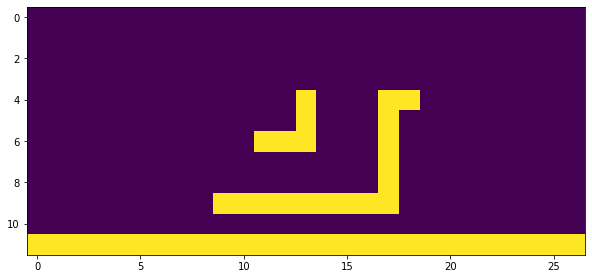

In [9]:
# let's see how the cave looks like
lines = parse_input('data/day14_example')
cave, x_shift =  create_cave_contours(lines)
cave = fill_cave_with_rocks(cave, x_shift, lines)
cave = add_floor(cave)

plt.rcParams["figure.figsize"] = [10, 10]
plt.imshow(cave, aspect=1);

In [10]:
def solve_puzzle_2(puzzle_input, plot=True, plot_animation=False, figsize=[5,5]):
    lines = parse_input(puzzle_input)
    cave, x_shift =  create_cave_contours(lines)
    cave = fill_cave_with_rocks(cave, x_shift, lines)
    cave = add_floor(cave)
    starting_point = (0, 500 - x_shift)
    
    plt.rcParams["figure.figsize"] = figsize

    while cave[starting_point[0], starting_point[1]] == 0:  # starting point blocked
        sand = Sand(starting_point[0], starting_point[1])
        cave = sand.fall(cave)
    
        if plot_animation:
            plt.imshow(cave);
            display.clear_output(wait=True);
            display.display(plt.gcf());

    sand_rest = (cave == 2).sum()
    display.clear_output(wait=True);
    if plot:
        plt.imshow(cave);
    print(f'Units of sand rest: {sand_rest}');

Units of sand rest: 93


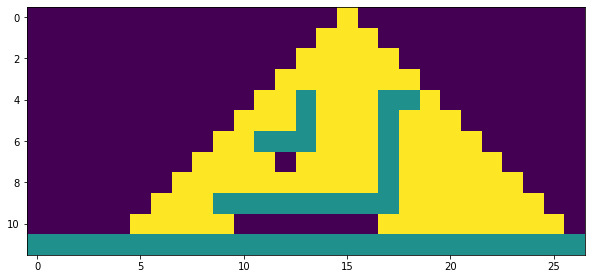

In [13]:
solve_puzzle_2('data/day14_example', plot=True, figsize=[10, 10])

Units of sand rest: 26729


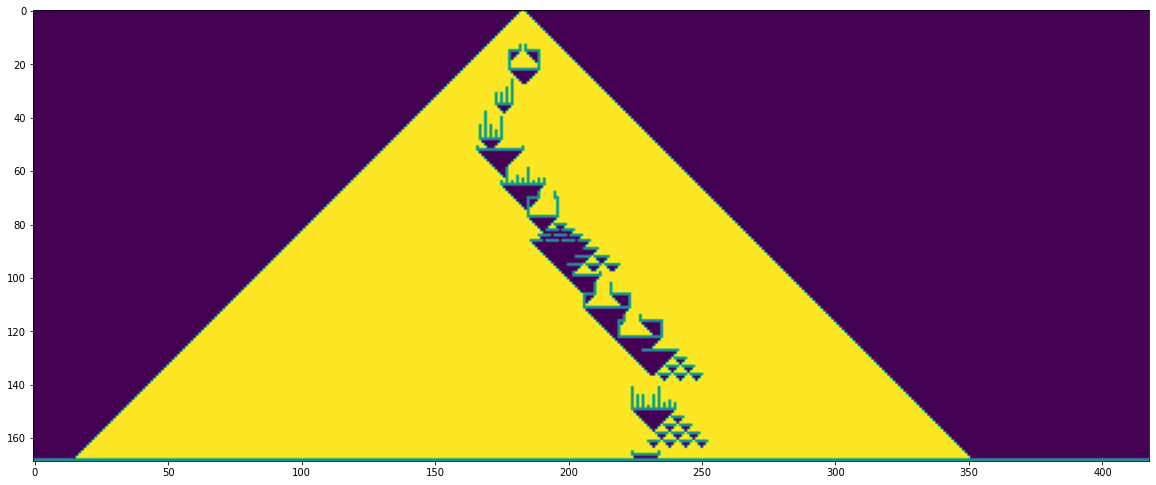

In [12]:
solve_puzzle_2('data/day14', plot=True, figsize=[20,20])

---

<a id='day15'><a/>

## --- Day 15: Beacon Exclusion Zone ---

##### Part 1:

In [2]:
plt.rcParams["figure.figsize"] = [5,5]

In [3]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    
    def __sub__(self, other):
        """
        Define manhattan distance as operator substract
        """
        return np.abs(self.x - other.x) + np.abs(self.y - other.y)
        
    
    def shift(self, x_shift, y_shift):
        """
        Translation of the point in both directions a specified number of units
        This is to avoid negative indexing
        """
        self.x += x_shift
        self.y += y_shift
    
        
    def __repr__(self):
        return f'{type(self).__name__}({self.x}, {self.y})'
    
    
class Sensor(Point):
    def __init__(self, x, y):
        super().__init__(x, y)
        
        
class Beacon(Point):
    def __init__(self, x, y):
        super().__init__(x, y)
    

In [4]:
def parse_input(puzzle_input):
    """
    Parse the input and returns pairs of Sensor-Beacon
    """
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    reports = []
    for line in lines:
        values_from_line = [int(re.split(r' |,|=|:', line)[i]) for i in (3,6,13,16)]
        sensor = Sensor(*values_from_line[:2])
        beacon = Beacon(*values_from_line[2:])
        reports.append((sensor, beacon))

    return reports

The approach that follows is fine for the example but fails in the main puzzle because of overflow:

In [35]:
def get_boundaries(reports):
    """
    Calculates the shift required to avoid negative indexing, and the size of the
    array needed to fit everything
    """
    
    distances = [item[1] - item[0] for item in reports]
    
    min_x = min([item[0].x - distance for item, distance in zip(reports, distances)])
    max_x = max([item[0].x + distance for item, distance in zip(reports, distances)])
    min_y = min([item[0].y - distance for item, distance in zip(reports, distances)])
    max_y = max([item[0].y + distance for item, distance in zip(reports, distances)])
    
    x_shift = - min_x + 1
    y_shift = - min_y + 1
    x_size = max_x + x_shift + 1
    y_size = max_y + y_shift + 1

    return (x_shift, y_shift), (x_size, y_size)


def process_report(space, report):
    """
    Given a report line (pair of sensor-beacon), calculates the portion of space
    that can not allocate other beacons
    """
    sensor, beacon = report
    dist = sensor - beacon
    
    for i in range(sensor.x - dist, sensor.x + dist + 1):
        for j in range(sensor.y - dist, sensor.y + dist + 1):
            position = Point(i, j)
            if sensor - position <= dist and space[i,j] == 0:
                space[i, j] = 3 # no other beacons there
    return space

In [36]:
reports = parse_input('data/day15_example')
# reports[:3]
shift_value, size = get_boundaries(reports)

# shift everything to avoid negative numbers
for pair in reports:
    pair[0].shift(shift_value[0], shift_value[1]) #sensors
    pair[1].shift(shift_value[0], shift_value[1]) # beacons
    
# create board
space = np.zeros(size, dtype=int)

# add sensors and beacons
for pair in reports:
    space[pair[0].x, pair[0].y] = 1 #sensor
    space[pair[1].x, pair[1].y] = 2 #beacon

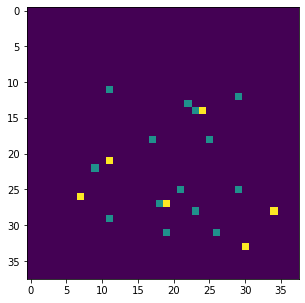

In [37]:
plt.imshow(space.T);

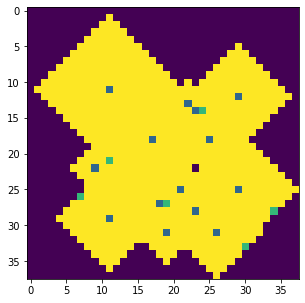

In [38]:
for report in reports:
    space = process_report(space, report)

plt.imshow(space.T);

In [43]:
target_y = 10 + shift_value[1]
(space[:, target_y] == 3).sum()

26

The approach above is fine with the simple example but fails in the main puzzle because of overflow. Let's see how to reach the solution in a not so computational expensive way. 

**Idea 1**: discard pairs sensor-beacon that are irrelevant regarding the target row. It's fine but still don't help enough

**Idea 2**: find the specific interval of the target row for each pair sensor-beacon. Once computed all of them make a union

In [99]:
def report_is_relevant(report, row):
    """
    Evaluates if a pair sensor-beacon is relevant regarding a specific row
    """
    sensor, beacon = report
    dist = sensor - beacon
    return np.abs(sensor.y - row) <= dist


def calculate_interval(report, row):
    """
    Given a pair sensor-beacon, the function calculates the interval that is blocked
    in a sepcific row
    """
    sensor, beacon = report
    dist = sensor - beacon
    
    distance_to_row = np.abs(sensor.y - row)
    
    half_width = dist - distance_to_row
    interval = (sensor.x - half_width, sensor.x + half_width)
    return interval



def union_of_intervals(intervals):
    """
    Given a set of intervals, the function orders and combine them deleting overlaps
    Example: [(-2,10), (7,9), (8,12), (14, 35)] becomes [(-2, 12), (14, 35)]
    """
    result = []
    for begin,end in sorted(intervals):
        if result and result[-1][1] > end:
            pass
        elif result and result[-1][1] >= begin - 1:
            result[-1] = (result[-1][0], end)
        else:
            result.append((begin, end))
    return result



def solve_puzzle_1(puzzle_input, row):
    
    reports = parse_input(puzzle_input)
    relevant_reports = [report for report in reports if report_is_relevant(report, row)]
    intervals = [calculate_interval(report, row) for report in relevant_reports]
    union = union_of_intervals(intervals)
    
    result = 0
    for interval in union:
        result += interval[1] - interval[0] + 1

    # discount sensors and beacons in the row
    x_occupied = []
    for report in reports:
        sensor, beacon = report
        if sensor.y == row:
            x_occupied.append(sensor.x)
        if beacon.y == row:
            x_occupied.append(beacon.x)
    places_occupied = len(set(x_occupied))
        
    return result - places_occupied

In [100]:
solve_puzzle_1('data/day15_example', 10)

26

In [101]:
solve_puzzle_1('data/day15', 2000000)

4582667

##### Part 2:

In [128]:
def truncate_intervals(intervals, min_value, max_value):
    """
    Given a set of ordered intervals, the function truncate them given two boundaries.
    Example: [(-2, 12), (14, 35)] with boundaries (0, 20) becomes [(0, 12), (14, 20)]
    """
    result = []
    for begin, end in sorted(intervals):
        if end < min_value:
            continue
        if begin > max_value:
            continue
        if begin <= min_value and end >= max_value:
            result.append((min_value,max_value))
        if begin <= min_value and end < max_value:
            result.append((min_value, end))
        if begin > min_value and end < max_value:
            result.append((begin,end))
        if begin > min_value and end >= max_value:
            result.append((begin, max_value))

    return result


def solve_puzzle_2(puzzle_input, row_min, row_max, starting_at=None):
    
    if not starting_at:
        starting_at = row_min
    
    for row in range(starting_at, row_max+1):
                
        reports = parse_input(puzzle_input)
        relevant_reports = [report for report in reports if report_is_relevant(report, row)]
        intervals = [calculate_interval(report, row) for report in relevant_reports]
        union = union_of_intervals(intervals)
        trunc_union = truncate_intervals(union, row_min, row_max)
        
#         if row != 0 and row%100000 == 0:
#             print(row, trunc_union)
        
        if len(trunc_union) == 2:
            x = trunc_union[0][1] + 1
            y = row
            print(f'Available position: ({x}, {y})')
            print(f'Puzzle result = {x*4000000 + y}')
            break

In [129]:
solve_puzzle_2('data/day15_example', 0, 20)

Available position: (14, 11)
Puzzle result = 56000011


In [130]:
# warning: it takes several minutes starting from 0
solve_puzzle_2('data/day15', 0, 4000000, starting_at=2600000)

Available position: (2740279, 2625406)
Puzzle result = 10961118625406


---

<a id='day16'><a/>

## --- Day 16: Proboscidea Volcanium ---

##### Part 1:

This one was too tough for me. <br>
The code is based on the solution of [hyper-neutrino](https://www.youtube.com/@hyper-neutrino), who shared the walk-through of his [day 16 solution](https://www.youtube.com/watch?v=bLMj50cpOug). <br><br>
It's an extremely smart and efficient solution. The differences with my code are:
- I use dikjstraa algorithm to find the distance matrix, with all nodes. He uses a more efficient algorithm.
- I'm not using the bitmask solution (smart but weird). I use a very similar approach with a 1s and 0s string which is more clear to me.

---

The approach to solve the puzzle is as follows:
1. Read the input
2. Compute a distance matrix between relevant nodes (nodes with flow rate > 0)
3. Algorithm DFS (depth-first search algorithm). 
    - This algorithm uses recursion. In this puzzle there are a lot of repeating situations. So we'll store a cache with known states in order to not repeating already computed states and save a lot of time.
    - We will compute states considering three variables: remaining time, current valve, remaining closed valves

In [2]:
def parse_input(puzzle_input):
    """
    Reads the input and returns:
    valves: dict -> {valve_name: flow_rate, ...}
    tunnels: dict -> {valve_name: [list of neighbours], ...}
    """
    
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    lines = [re.split(r' |, |=|; ', line) for line in lines]
    lines = [(line[1], int(line[5]), line[10:]) for line in lines]
    valves = {}
    tunnels = {}
    for line in lines:
        valves[line[0]] = line[1]
        tunnels[line[0]] = line[2]

    return valves, tunnels



def get_distance_matrix(valves, tunnels):
    """
    dijkstraa algorithm for compute the distance matrix.
    After that we reduce the output because we only need the distances between relevant nodes
    """
    distances = {}

    for distance_from in valves:

        data = []
        for node in valves:
            data.append([node, np.inf, False])

        df = pd.DataFrame(data, columns=['node', 'distance', 'visited'])
        df.set_index('node', inplace=True)
        df.loc[distance_from, 'distance'] = 0

        while not all(df['visited']):

            # get the node not visited with the least distance:
            current = df[~df['visited']]['distance'].idxmin()
            current_distance = df[~df['visited']]['distance'].min()

            # get neighbours from current:
            neighbours = tunnels[current]
            #For each possible node to go:
            for neighbour in neighbours:
                # If the estimated distance is less than the previous value, update it
                if current_distance + 1 < df.loc[neighbour, 'distance']:
                    df.loc[neighbour, 'distance'] = current_distance + 1

            # Mark the node as visited
            df.loc[current, 'visited'] = True

        distances[distance_from] = df['distance'].to_dict()


    distances_reduced = {}
    for origin in distances:
        if origin == 'AA' or valves[origin] > 0:
            target_nodes = {}
            for target, flow_rate in distances[origin].items():
                if target != origin and valves[target] > 0:
                    target_nodes[target] = int(flow_rate)
            distances_reduced[origin] = target_nodes

    return distances_reduced



def get_relevant_valves(valves):
    """
    Returns a list with the Valves with flow_rate > 0, and a 
    string representing the initialization status of the relevant valves (all closed (0) at the beginning)
    """
    relevant_valves = []
    initial_status = ''
    for valve, flow_rate in valves.items():
        if flow_rate > 0:
            relevant_valves.append(valve)
            initial_status += '0'

    return relevant_valves, initial_status



cache = {}
def dfs(time, valve, status):
    """
    Recurrent depth-first search algorithm.
    We use a cache to avoid computing repeated scenarios
        (scenario = remainig time + current valve + status of valves)
    """
    
    if (time, valve, status) in cache:
        return cache[(time, valve, status)]
    
    maxval = 0
    for neighbour in dists[valve]:
        idx = relevant_valves.index(neighbour)
        if status[idx] == '1': # if neighbour is already open, skip
            continue
        remtime = time - dists[valve][neighbour] - 1  # decrease in minutes to reach the neigbour and 1 to open
        if remtime <= 0:
            continue
        maxval = max(maxval, dfs(remtime, neighbour, status[:idx] + '1' + status[idx+1:]) + remtime * valves[neighbour])
    
    cache[(time, valve, status)] = maxval
    
    return maxval

In [3]:
valves, tunnels = parse_input('data/day16_example')
dists = get_distance_matrix(valves, tunnels)
relevant_valves, initial_status = get_relevant_valves(valves)
cache = {}
dfs(30, 'AA', initial_status)

1651

In [4]:
valves, tunnels = parse_input('data/day16')
dists = get_distance_matrix(valves, tunnels)
relevant_valves, initial_status = get_relevant_valves(valves)
cache = {}
dfs(30, 'AA', initial_status)

2114

##### Part 2:

We use the same idea than in part 1. This time we have 5 variables that define our state:
- Remainig time for me
- Remaining time for the elephant
- Current valve where I am
- Current valve where the elephant is
- Status of all the valves (open or closed)

We will move only who has more remainig time, keeping constant the variables of the other

In [5]:

cache = {}
def dfs(time_me, time_elephant, valve_me, valve_elephant, status):
    """
    Recurrent depth-first search algorithm.
    We use a cache to avoid computing repeated scenarios
        (scenario = remainig time + current valve + status of valves)
    """
    
    if (time_me, time_elephant, valve_me, valve_elephant, status) in cache:
        return cache[(time_me, time_elephant, valve_me, valve_elephant, status)]
    
    maxval = 0
    
    if time_me >= time_elephant:
    
        for neighbour in dists[valve_me]:
            idx = relevant_valves.index(neighbour)
            if status[idx] == '1': # if neighbour is already open, skip
                continue
            remtime_me = time_me - dists[valve_me][neighbour] - 1  # decrease in minutes to reach the neigbour and 1 to open
            if remtime_me <= 0:
                continue
            maxval = max(maxval, dfs(remtime_me, time_elephant, neighbour, valve_elephant, status[:idx] + '1' + status[idx+1:]) + remtime_me * valves[neighbour])
    
    else:
        
        for neighbour in dists[valve_elephant]:
            idx = relevant_valves.index(neighbour)
            if status[idx] == '1': # if neighbour is already open, skip
                continue
            remtime_elephant = time_elephant - dists[valve_elephant][neighbour] - 1  # decrease in minutes to reach the neigbour and 1 to open
            if remtime_elephant <= 0:
                continue
            maxval = max(maxval, dfs(time_me, remtime_elephant, valve_me, neighbour, status[:idx] + '1' + status[idx+1:]) + remtime_elephant * valves[neighbour])

    cache[(time_me, time_elephant, valve_me, valve_elephant, status)] = maxval

    return maxval

In [6]:
valves, tunnels = parse_input('data/day16_example')
dists = get_distance_matrix(valves, tunnels)
relevant_valves, inicial_status = get_relevant_valves(valves)
cache = {}
dfs(26, 26, 'AA', 'AA', inicial_status)

1707

In [7]:
valves, tunnels = parse_input('data/day16')
dists = get_distance_matrix(valves, tunnels)
relevant_valves, inicial_status = get_relevant_valves(valves)
cache = {}
dfs(26, 26, 'AA', 'AA', inicial_status)

# it takes a couple of minutes

2666

---

<a id='day17'><a/>

## --- Day 17: Pyroclastic Flow ---

##### Part 1:

In [2]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        return file.read()


def appear_rock(shape, max_height):
    """
    Returns a numpy array with the initial position of the rock that appears.
    It depends on the max heigh of the pile of rocks in the cave
    Note: appears 4 units above the max heigh instead of 3, because we program cycles
    of movements fall-jet-fall-jet...
    """
    if shape == 'minus':
        a = np.array([[1,1,1,1]], dtype=int)
    elif shape == 'plus':
        a = np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=int)
    elif shape == 'L':
        a = np.array([[0,0,1],[0,0,1],[1,1,1]], dtype=int)
    elif shape == 'vertical':
        a = np.array([[1],[1],[1],[1]], dtype=int)
    elif shape == 'square':
        a = np.array([[1,1],[1,1]], dtype=int)
    
    a = np.pad(a, [(0,4+max_height),(2,5-a.shape[1])], mode='constant', constant_values=0)
    return a


def move_rock(rock, direction):
    """
    rock is a numpy array of zeros except the rock is ones. 
    The function moves the rock right(>), left(<) or down(v), 
    keeping the dimensions of the original array
    """
    
    if direction == '>':
        rock = np.pad(rock, [(0,0),(1,0)], mode='constant', constant_values=0)[:,:-1] \
                                                    if rock[:,-1].max() == 0 else rock
    elif direction == '<':
        rock = np.pad(rock, [(0,0),(0,1)], mode='constant', constant_values=0)[:,1:] \
                                                    if rock[:,0].max() == 0 else rock
    elif direction == 'v':
        rock = np.pad(rock, [(1,0),(0,0)], mode='constant', constant_values=0)[:-1,:]
    else:
        raise ValueError
    return rock   


def get_max_height(cave):
    """
    Returns the number of rows with rocks, aka the max height of the pile of rocks
    """
    return (cave.sum(axis=1)>0).sum()


def resize_cave(cave, rock):
    """
    Resize the cave shape to have the same height than the rock array by adding zeros on top
    """
    if rock.shape[0] > cave.shape[0]:
        cave = np.pad(cave, [(rock.shape[0]-cave.shape[0],0),(0,0)], mode='constant', constant_values=0)
    else:
        rock = np.pad(rock, [(cave.shape[0]-rock.shape[0],0),(0,0)], mode='constant', constant_values=0)
    return cave, rock


def is_laying(rock, cave):
    """
    Check if a rock is laying on the top of the pile of rocks or otherwise can keep falling
    """
    rock = move_rock(rock, 'v')
    return (rock + cave > 1).sum() > 0


def solve_puzzle_1(puzzle_input, n_rocks):
    
    jet_pattern = parse_input(puzzle_input)
    jet_iterator = cycle(jet_pattern)
    rock_iterator = cycle(['minus', 'plus', 'L', 'vertical', 'square'])
    cave = np.array([[1,1,1,1,1,1,1]])
    
    for _ in range(n_rocks):
        max_height = get_max_height(cave)
        rock = appear_rock(next(rock_iterator), max_height)
        cave, rock = resize_cave(cave, rock)
        while not is_laying(rock, cave):
            rock = move_rock(rock, 'v')
            # check if lateral movement is possible
            new_rock = move_rock(rock, next(jet_iterator))
            if (new_rock + cave > 1).sum() == 0:
                rock = new_rock
        cave = cave + rock

    max_height = get_max_height(cave)
    return max_height-1

In [3]:
solve_puzzle_1('data/day17_example', 2022)

3068

In [4]:
solve_puzzle_1('data/day17', 2022)

3065

##### Part 2:

The solution of Part 1 is not feasible here, we can't build an array of such dimensions. 

There is an optimization consisting in prune the cave from below when the bottom part is irrelevant, save the height of discarded units and follow up and up until the end of the rocks.

To decide how many units from the bottom are irrelevant we will mark the accessible spaces from top (similar to the puzzle of the sand) and keep the heigh of them plus one.

In [5]:
def reduce_cave(c, cum_height):
    """
    Given a cave and a stored cumulated heigh, the function prunes the cave from below,
    discarding the not relevant part, and adds the discarded units to the cumulative heigh.
    """

    height_before = c.shape[0]
    
    #initialization
    c[0,:] = (c[0,:] - 2) * (-1)

    # fill up open spaces with 2s
    while True:
        open_spaces_before = (c==2).sum()

        # bottom:
        x = np.where(c == 2)[0] + 1
        y = np.where(c == 2)[1]
        c[x,y] = c[x,y] + (c[x,y] == 0)*2

        # right
        x = np.where(c[:,:-1] == 2)[0]
        y = np.where(c[:,:-1] == 2)[1] + 1
        c[x,y] = c[x,y] + (c[x,y] == 0)*2

        # left
        x = np.where(c[:,1:] == 2)[0]
        y = np.where(c[:,1:] == 2)[1] + 1 - 1
        c[x,y] = c[x,y] + (c[x,y] == 0)*2

        open_spaces_after = (c==2).sum()

        if open_spaces_before == open_spaces_after:
            break

    # find the max depth still open
    top_rows_to_keep = np.where(c==2)[0].max() + 1

    # prune the cave and set back open space to 0
    c = c[:top_rows_to_keep+1, :]
    c[c==2] = 0
    
    height_after = c.shape[0]
    cum_height += height_before - height_after
    
    return c, cum_height

In [6]:
def get_heigh_after_n_rocks(puzzle_input, n_rocks, verbose=False):
    """
    Returns the heigh of the cave after n rocks.
    Verbise = True prints the current rock and state of the top of the cave when index in the
    jet pattern is 0, with the goal of finding a repeating pattern    
    """
    
    jet_pattern = parse_input(puzzle_input)
    jet_iterator = cycle(enumerate(jet_pattern))
    rock_iterator = cycle(['minus', 'plus', 'L', 'vertical', 'square'])
    cave = np.array([[1,1,1,1,1,1,1]])
    cum_height = 0

    for i in range(n_rocks):
        max_height = get_max_height(cave)
        rock_type = next(rock_iterator)
        rock = appear_rock(rock_type, max_height)
        cave, rock = resize_cave(cave, rock)
        while not is_laying(rock, cave):
            rock = move_rock(rock, 'v')
            # check if lateral movement is possible
            jet = next(jet_iterator)
            new_rock = move_rock(rock, jet[1])
            if (new_rock + cave > 1).sum() == 0:
                rock = new_rock

            if verbose:
                # print situation every time jet list restarts
                if jet[0] == 0:
                    print(i, rock_type, jet[1], cave[7:12,:].ravel())

        cave = cave + rock

        # reduce_cave
        if i%50 == 0:
            cave, cum_height = reduce_cave(cave, cum_height)

    max_height = get_max_height(cave)
    max_height += cum_height
    return max_height-1

In [7]:
get_heigh_after_n_rocks('data/day17_example', 2022)

3068

In [8]:
get_heigh_after_n_rocks('data/day17', 2022)

3065

The solution is correct and optimize a little bit but is not enough to solve the problem with 1 trillion rocks. In fact, the number of rocks is so hugh that the solution has to involve some technique to reduce that number. We have to find a repeating pattern in the combination of rocks and jets to just calculate the heigh of that pattern, multiply by the times the pattern happens and add the heigh of the reminding rocks.

In [9]:
get_heigh_after_n_rocks('data/day17_example', 100, verbose=True)

0 minus > []
8 vertical > [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0]
14 square > [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0]
22 L > [0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
29 square > [1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0]
36 plus > [0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
43 vertical > [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
49 square > [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1]
57 L > [0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
64 square > [1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0]
71 plus > [0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
78 vertical > [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0]
84 square > [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0

157

We see some repeating patterns. For example, in rocks 22, 57, 92, ...  
The total height is:  
`h23 + (h58 - h23) * n_times + (h58+remainder - h58)`

where:
- `n_times = (N - 23) // (58-23+1)`
- `remainder = (N - 23) % (58-23+1)`

In [10]:
puzzle_input = 'data/day17_example'
N = 1000000000000
r1 = 23
r2 = 58

times = (N - r1) // (r2 - r1)
reminder = (N - r1) % (r2 - r1)

h1 = get_heigh_after_n_rocks(puzzle_input, r1)
h2 = get_heigh_after_n_rocks(puzzle_input, r2)
h3 = get_heigh_after_n_rocks(puzzle_input, r2+reminder)

total_heigh = h1 + times * (h2-h1) + (h3-h2)
print(total_heigh)

1514285714288


In [11]:
get_heigh_after_n_rocks('data/day17', 10000, verbose=True)

0 minus > []
1707 L > [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]
3442 L > [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]
5177 L > [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]
6912 L > [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]
8647 L > [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


15537

In [12]:
puzzle_input = 'data/day17'
N = 1000000000000
r1 = 1707
r2 = 3442

times = (N - r1) // (r2 - r1)
reminder = (N - r1) % (r2 - r1)

h1 = get_heigh_after_n_rocks(puzzle_input, r1)
h2 = get_heigh_after_n_rocks(puzzle_input, r2)
h3 = get_heigh_after_n_rocks(puzzle_input, r2+reminder)

total_heigh = h1 + times*(h2-h1) + (h3-h2)
print(total_heigh)

1562536022966


---

<a id='day18'><a/>

## --- Day 18: Boiling Boulders ---

##### Part 1:

Given a point (x,y,z), we can define 6 sides uniquely with the combination of two points (diagonal of the side):

- c1 = ((x,y,z),(x+1,y,z))
- c2 = ((x,y,z),(x,y+1,z))
- c3 = ((x,y,z),(x,y,z+1))
- c4 = ((x+1,y,z),(x+1,y+1,z+1))
- c5 = ((x,y+1,z),(x+1,y+1,z+1))
- c6 = ((x,y,z+1),(x+1,y+1,z+1))

For simplicity we can use a 1d tuple with 6 coordinates. 
The problem is reduced to generate the sides of all points and keep only sides that have been generated only once

In [2]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    
    return [eval(line) for line in lines]


def get_point_sides(point):
    """
    Return a list of 6 sides given a 3d point
    """
    x, y, z = point
    c1 = (x,y,z,x+1,y,z+1)
    c2 = (x,y,z,x+1,y+1,z)
    c3 = (x,y,z,x,y+1,z+1)
    c4 = (x+1,y,z,x+1,y+1,z+1)
    c5 = (x,y+1,z,x+1,y+1,z+1)
    c6 = (x,y,z+1,x+1,y+1,z+1)
    return [c1,c2,c3,c4,c5,c6]


def solve_puzzle_1(puzzle_input):
    
    droplet = parse_input(puzzle_input)
    
    total_sides = []
    for point in droplet:
        total_sides += get_point_sides(point)

    counts = Counter(total_sides)
    return len([item for item in counts.items() if item[1]==1])

In [3]:
solve_puzzle_1('data/day18_example')

64

In [4]:
solve_puzzle_1('data/day18')

4460

##### Part 2:

Change of strategy. We go to a 3d numpy array that wraps completely the droplet. We will simulate the steam flowing from the external border to the center. When the process is stabilized the points where the steam has not been able to reach can be considered solid.

In [5]:
def get_trapped_points(droplet):
    
    """
    Build a numpy array that represents the droplet. Number coding:
    0: air
    1: lava
    2.steam from outside    
    """
    
    # building a numpy array that wraps the droplet.
    a = np.zeros(np.array(droplet).max(axis=0), dtype=int)
    for point in droplet:
        point = tuple(item - 1 for item in point)
        a[point] = 1
        
    # initialize steam in the borders
    a[:1,:,:][a[:1,:,:]==0] = 2
    a[-1:,:,:][a[-1:,:,:]==0] = 2
    a[:,:1,:][a[:,:1,:]==0] = 2
    a[:,-1:,:][a[:,-1:,:]==0] = 2
    a[:,:,:1][a[:,:,:1]==0] = 2
    a[:,:,-1:][a[:,:,-1:]==0] = 2
    
    # expand to the center until stabilized scenario
    while True:
        open_spaces_before = (a==2).sum()

        # x+:
        x = np.where(a[:-1,:,:] == 2)[0] + 1
        y = np.where(a[:-1,:,:] == 2)[1]
        z = np.where(a[:-1,:,:] == 2)[2]
        a[x,y,z] = a[x,y,z] + (a[x,y,z] == 0)*2

        # x-:
        x = np.where(a[1:,:,:] == 2)[0] +1 - 1
        y = np.where(a[1:,:,:] == 2)[1]
        z = np.where(a[1:,:,:] == 2)[2]
        a[x,y,z] = a[x,y,z] + (a[x,y,z] == 0)*2

        # y+
        x = np.where(a[:,:-1,:] == 2)[0]
        y = np.where(a[:,:-1,:] == 2)[1] + 1
        z = np.where(a[:,:-1,:] == 2)[2]
        a[x,y,z] = a[x,y,z] + (a[x,y,z] == 0)*2

        # y-
        x = np.where(a[:,1:,:] == 2)[0]
        y = np.where(a[:,1:,:] == 2)[1] + 1 - 1
        z = np.where(a[:,1:,:] == 2)[2]
        a[x,y,z] = a[x,y,z] + (a[x,y,z] == 0)*2

        # z+
        x = np.where(a[:,:,:-1] == 2)[0]
        y = np.where(a[:,:,:-1] == 2)[1]
        z = np.where(a[:,:,:-1] == 2)[2] + 1
        a[x,y,z] = a[x,y,z] + (a[x,y,z] == 0)*2

        # z-
        x = np.where(a[:,:,1:] == 2)[0]
        y = np.where(a[:,:,1:] == 2)[1]
        z = np.where(a[:,:,1:] == 2)[2] + 1 - 1
        a[x,y,z] = a[x,y,z] + (a[x,y,z] == 0)*2

        open_spaces_after = (a==2).sum()

        if open_spaces_before == open_spaces_after:
            break
    
    return [tuple(item) for item in (np.array(np.where(a==0))+1).T]


In [6]:
def solve_puzzle_2(puzzle_input):
    
    droplet = parse_input(puzzle_input)
    trapped_points = get_trapped_points(droplet)
    droplet += trapped_points
    
    total_sides = []
    for point in droplet:
        total_sides += get_point_sides(point)
    

    counts = Counter(total_sides)
    return len([item for item in counts.items() if item[1]==1])

In [7]:
solve_puzzle_2('data/day18_example')

58

In [8]:
solve_puzzle_2('data/day18')

2498

---

<a id='day19'><a/>

## --- Day 19: Not Enough Minerals ---

##### Part 1:

Codes:
- 0 = Ore
- 1 = Clay
- 2 = Obsidian
- 3 = Geode
- 4 = Do nothing

In [74]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    lines = [re.split(r' |:', line) for line in lines]
    lines = [[int(item) for item in line if item.isdigit()] for line in lines]

    blueprints = {}
    for line in lines:
        blueprints[line[0]] = {0:np.array([line[1],0,0,0]),        # ore
                               1:np.array([line[2],0,0,0]),        # clay
                               2:np.array([line[3],line[4],0,0]),  # obsidian
                               3: np.array([line[5],0,line[6],0])} # geode
    return blueprints

In [75]:
blueprints = parse_input('data/day19_example')
print(blueprints)

{1: {0: array([4, 0, 0, 0]), 1: array([2, 0, 0, 0]), 2: array([ 3, 14,  0,  0]), 3: array([2, 0, 7, 0])}, 2: {0: array([2, 0, 0, 0]), 1: array([3, 0, 0, 0]), 2: array([3, 8, 0, 0]), 3: array([ 3,  0, 12,  0])}}


The problem can be seen as a decision tree. Each node is a minute, where we can choose either buy a robot if we have saved enough resources or not to buy and save resources to use later. 

In [76]:
def compute_one_minute(resources, robots, time_remaining):
    """
    Calculates state after one minute regarding the collect resources process
    """
    
    resources = resources + robots
    time_remaining -= 1
    return resources, robots, time_remaining


def build_robot(robot_type, resources, robots, blueprint):
    """
    Calculates state after building a robot
    """
    cost = blueprint[robot_type]
    resources = resources - cost
    robots[robot_type] += 1
    return resources, robots


def get_possible_options(resources, blueprint):
    """
    Returns a list with the possible options to do next depending on the resources we have
    """
    
    options = [4]  # do nothing is always an option
    for robot_type, cost in blueprint.items():
        if np.all((resources - cost) >= 0):
            options.append(robot_type)
    
    # if 'geode' is an option, discard any other because is suboptimal
    if 3 in options:
        options = [3]
    
    return options


Optimizations:
- If you choose do nothing, having the resources to build a robot of a specific type, to build that robot in the next step is suboptimal.
- It's useless to have more ore robots than the most expensive (in ores) robot to build.
- If building a 'geode' is an option, any other options are suboptimal (already implemented in `get_possible_options()` function)

In [77]:
def get_max_robots(blueprint):
    """
    Given a blueprint, calculates the maximum number of robots to have of each type.
    More than that is suboptimal or useless
    """
    return np.array([item[1] for item in blueprint.items()]).max(axis=0)

The solution is to traverse the tree and keep the path that gives the maximum number of geodes. To traverse the full tree is not possible, so the optimizations to reduce the number of options are key in the calculation time

In [78]:
cache = {}
maxval = 0
def dfs(blueprint, max_robots, res, rob, time_rem=24, non_opt=[]):
    
    global maxval
    state = tuple([time_rem] + list(res) + list(rob))
    if state in cache:
        return cache[state]
    
    no_more_robots = np.where((max_robots[0:3] - rob[0:3]) == 0)[0]
    
    options = get_possible_options(res, blueprint)
    optimal_options = [option for option in options if option not in non_opt]
    optimal_options = [option for option in optimal_options if option not in no_more_robots]
    
    
    for option in optimal_options:

        resources = res.copy()
        robots = rob.copy()
        non_options = non_opt.copy()
        
        resources, robots, time_remaining = compute_one_minute(resources, robots, time_rem)
        # track of non_options. If we choose nothing to save resources when there were other options available,
        # to choose any of that options next is suboptimal
        if option == 4:
            non_options = [option for option in options if option != 4]
        else:
            # reset non_options when the option chosen is build something
            non_options = []

        if option != 4:
            resources, robots = build_robot(option, resources, robots, blueprint)
            
        if time_remaining > 0:
            # continue through the tree
            dfs(blueprint, max_robots, resources, robots, time_remaining, non_options)
        else:
            maxval = max(maxval, resources[3])
            cache[state] = maxval                   
            return
            

In [132]:
blueprints = parse_input('data/day19_example')
geodes = {}
for bp_number, blueprint in blueprints.items():
    max_robots = get_max_robots(blueprint)
    cache = {}
    maxval = 0
    dfs(blueprint, max_robots, np.array([0,0,0,0]), np.array([1,0,0,0]))
    geodes[bp_number] = maxval
    print(f'Blueprint {bp_number} -> {maxval} geodes')

solution = 0
for num_bp, num_geodes in geodes.items():
    solution += num_bp * num_geodes
    
print(f'Total quality level sum: {solution}')

Blueprint 1 -> 9 geodes
Blueprint 2 -> 12 geodes
Total quality level sum: 33


In [133]:
blueprints = parse_input('data/day19')
geodes = {}
for bp_number, blueprint in blueprints.items():
    max_robots = get_max_robots(blueprint)
    cache = {}
    maxval = 0
    dfs(blueprint, max_robots, np.array([0,0,0,0]), np.array([1,0,0,0]))
    geodes[bp_number] = maxval
    print(f'Blueprint {bp_number} -> {maxval} geodes')

solution = 0
for num_bp, num_geodes in geodes.items():
    solution += num_bp * num_geodes
    
print(f'Total quality level sum: {solution}')

Blueprint 1 -> 3 geodes
Blueprint 2 -> 0 geodes
Blueprint 3 -> 0 geodes
Blueprint 4 -> 3 geodes
Blueprint 5 -> 0 geodes
Blueprint 6 -> 5 geodes
Blueprint 7 -> 1 geodes
Blueprint 8 -> 2 geodes
Blueprint 9 -> 2 geodes
Blueprint 10 -> 6 geodes
Blueprint 11 -> 11 geodes
Blueprint 12 -> 0 geodes
Blueprint 13 -> 1 geodes
Blueprint 14 -> 7 geodes
Blueprint 15 -> 0 geodes
Blueprint 16 -> 3 geodes
Blueprint 17 -> 6 geodes
Blueprint 18 -> 0 geodes
Blueprint 19 -> 12 geodes
Blueprint 20 -> 2 geodes
Blueprint 21 -> 1 geodes
Blueprint 22 -> 0 geodes
Blueprint 23 -> 0 geodes
Blueprint 24 -> 3 geodes
Blueprint 25 -> 2 geodes
Blueprint 26 -> 7 geodes
Blueprint 27 -> 0 geodes
Blueprint 28 -> 4 geodes
Blueprint 29 -> 0 geodes
Blueprint 30 -> 14 geodes
Total quality level sum: 1653


##### Part 2:

In [82]:
# warning: runs in 4-5 minutes
blueprints = parse_input('data/day19')
blueprints = {key: value for key, value in blueprints.items() if key in [1,2,3]}
geodes = {}
for bp_number, blueprint in blueprints.items():
    max_robots = get_max_robots(blueprint)
    cache = {}
    maxval = 0
    dfs(blueprint, max_robots, np.array([0,0,0,0]), np.array([1,0,0,0]), time_rem=32)
    geodes[bp_number] = maxval
    print(f'Blueprint {bp_number} -> {maxval} geodes')

solution = 1
for num_bp, num_geodes in geodes.items():
    solution *= num_geodes
    
print(f'Total: {solution}')

Blueprint 1 -> 26 geodes
Blueprint 2 -> 9 geodes
Blueprint 3 -> 18 geodes
Total: 4212


---

<a id='day20'><a/>

## --- Day 20: Grove Positioning System ---

##### Part 1:

In [2]:
def parse_input(puzzle_input):
    """
    Return a list with the numbers of the input
    """
    with open(puzzle_input) as file:
        sequence = file.read().splitlines()
        sequence = [int(num) for num in sequence]
    return sequence 


def solve_puzzle_1(puzzle_input):
    """
    We maintain two lists in parallel:
    sequence: keeping track of the resulting mixing sequence
    order: keeping track of the position of the originally ordered elements
    """
    
    sequence = parse_input(puzzle_input)   
    l = len(sequence)
    order = list(range(l))

    for i in range(l):
            
        # get position of the ordered i element
        idx = order.index(i)

        # pop that number
        value = sequence.pop(idx)
        _____ = order.pop(idx)

        sequence.insert((idx + value % (l - 1)) % l + (idx + value % (l - 1)) // l, value)
        order.insert((idx + value % (l - 1)) % l + (idx + value % (l - 1)) // l , i)

    # once the sequence have been mixed properly we get the three values required and sum them all
    idx_0 = sequence.index(0)
    total = 0
    for positions in [1000, 2000, 3000]:
        total += sequence[(idx_0 + positions) % l]

    return total

In [3]:
solve_puzzle_1('data/day20_example')

3

In [4]:
solve_puzzle_1('data/day20')

7228

##### Part 2:

In [5]:
def solve_puzzle_2(puzzle_input):
    
    sequence = parse_input(puzzle_input)   
    
    KEY = 811589153
    sequence = [item * KEY for item in sequence]
    l = len(sequence)
    order = list(range(l))

    for k in range(10):

        for i in range(l):
            # get position of the ordered i element
            idx = order.index(i)

            # pop that number
            value = sequence.pop(idx)
            _____ = order.pop(idx)

            sequence.insert((idx + value % (l - 1)) % l + (idx + value % (l - 1)) // l, value)
            order.insert((idx + value % (l - 1)) % l + (idx + value % (l - 1)) // l , i)

    # once the sequence have been mixed properly we get the three values required and sum them all
    idx_0 = sequence.index(0)
    total = 0
    for positions in [1000, 2000, 3000]:
        total += sequence[(idx_0 + positions) % l]

    return total

In [6]:
solve_puzzle_2('data/day20_example')

1623178306

In [7]:
solve_puzzle_2('data/day20')

4526232706281

---

<a id='day21'><a/>

## --- Day 21: Monkey Math ---

##### Part 1:

My first solution was based on try-except python `exec` functionality until every variable has a value.

However it's faster the solution based on storing the values in a dictionary.  
From the solution of hyper-neutrino I've learnt that you can append on the iterator you are currently iterating.  
Its like saying: *"hey item, if you are not ready put yourself at the back of the line!"*

In [2]:
def parse_input(puzzle_input):
    """
    Returns every line in the form ('var1', ['num' | 'var2','operator','var3'])
    """
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    lines = [s.split(' ') for s in lines]
    lines = [(line[0][0:-1], line[1:]) for line in lines]
    return lines
    
    
def solve_puzzle_1(puzzle_input):
    """
    Iterates through the input until all lines are fully computed. It requires put aside 
    the lines when they cannot be still computed and come back to them later 
    """
    
    lines = parse_input(puzzle_input)
    monkeys = {}

    for line in lines:
        monkey, expression = line
        if expression[0].isdigit():
            monkeys[monkey] = expression[0]
        else:
            monkey1, operator, monkey2 = expression
            if (monkey1 in monkeys) and (monkey2 in monkeys):
                monkeys[monkey] = eval(f'{monkeys[monkey1]} {operator} {monkeys[monkey2]}')
            else:
                lines.append(line)


    return int(monkeys['root'])

In [3]:
solve_puzzle_1('data/day21_example')

152

In [4]:
solve_puzzle_1('data/day21')

158731561459602

##### Part 2:

To iterate over all possible numbers for `humn` variable takes too long.  

Again, the solution is taken from the hyper-neutrino solution showed in his YouYube channel.  
The solution can be found using symbolic math with the sympy package.  

The algorithm is same than in Part 1, but we go forward through the assignment expressions with symbolic math around the value of `humn` variable (called `x`). When everyting is computed and we get to the `root` variable we can easily isolate the `x` obtaining the value needed.

In [5]:
def solve_solution_2(puzzle_input):
    """
    Iterates through the input until all lines are fully computed. It requires put aside 
    the lines when they cannot be still computed and come back to them later.
    
    Treat 'humn' value as a symbolic math variable.
    """
    
    lines = parse_input(puzzle_input)
    monkeys = { 'humn': sympy.Symbol('x')}

    opreations = {
        '+': lambda x,y: x+y,
        '-': lambda x,y: x-y,
        '*': lambda x,y: x*y,
        '/': lambda x,y: x/y,    
    }

    for line in lines:
        monkey, expression = line
        if monkey in monkeys:
            continue
        if expression[0].isdigit():
            monkeys[monkey] = sympy.Integer(expression[0])
        else:
            monkey1, operator, monkey2 = expression
            if (monkey1 in monkeys) and (monkey2 in monkeys):

                if monkey == 'root':
                    solution = sympy.solve(monkeys[monkey1] - monkeys[monkey2], 'x')[0]
                    break
                else:
                    monkeys[monkey] = opreations[operator](monkeys[monkey1], monkeys[monkey2])
            else:
                lines.append(line)

    return solution

In [6]:
solve_solution_2('data/day21_example')

301

In [7]:
solve_solution_2('data/day21')

3769668716709

---

<a id='day22'><a/>

## --- Day 22: Monkey Map ---

We define a **state** as a 3 element tuple: (position x, position y, direction). Direction is one of *R(right), D(down), L(left), U(up)*

##### Part 1:

In [2]:
def parse_input(puzzle_input, draw=False):
    """
    Returns:
    - The board as a 2D numpy array
    - List of steps
    - Initial position as a state tuple (x, y, direction)
    """
    
    with open(puzzle_input) as file:
        lines = file.read().splitlines()
    
    # board parsing
    board = lines[0:-2]
    board = [list(item.replace(' ','0').replace('.','1').replace('#','2')) for item in board]
    max_columns = max([len(item) for item in board])
    board = [[int(i) for i in l] + ([0]*(max_columns-len(l))) for l in board]
    board = np.array(board)
    board = np.pad(board, ((1,1),(1,1)), mode='constant')
    if draw:
        plt.imshow(board);

    # path parsing
    path = lines[-1]
    steps = []
    num = ''
    for i, ch in enumerate(path):
        if ch.isdigit():
            num += ch
        else:
            steps.append(int(num))
            num = ''
            steps.append(ch)
        if i == len(path)-1:
            steps.append(int(num))
    
    # initial position
    x = 1
    y = np.where(board[x,:]==1)[0][0]
    d = 'R'
    state = (x, y, d)
    
        
    return board, steps, state


def get_final_password(state):
    """
    Returns password given x, y, and direction
    """
    x, y, d = state
    return x * 1000 + y * 4 + 'RDLU'.index(d)


def change_direction(current, turn):
    if turn == 'R':
        return 'RDLUR'['RDLUR'.index(current) + 1]
    if turn == 'L':
        return 'RULDR'['RULDR'.index(current) + 1]
    else:
        raise ValueError('parameter turn must be R or L')


def move(B, state):
    """
    Given a state (x, y, direction), this function returns the new state after attempt 
    to move one square from x, y in the given direction.
    If the target position is a wall the final state is the same as the initial (not moving)
    If the initial position is in the edge, the target is calculated considering the wrapping rules
    """
    
    x, y, d = state
    
    if d == 'R':
        if B[x, y+1] == 1:
            return x, y+1, d
        elif B[x, y+1] == 2:
            return x, y, d
        else:
            y_wrap = np.where(B[x,:]!=0)[0][0]
            if B[x, y_wrap] == 2:
                return x, y, d
            else:
                return x, y_wrap, d

    if d == 'L':
        if B[x, y-1] == 1:
            return x, y-1, d
        elif B[x, y-1] == 2:
            return x, y, d
        else:
            y_wrap = np.where(B[x,:]!=0)[0][-1]
            if B[x, y_wrap] == 2:
                return x, y, d
            else:
                return x, y_wrap, d
    

    if d == 'D':
        if B[x+1, y] == 1:
            return x+1, y, d
        elif B[x+1, y] == 2:
            return x, y, d
        else:
            x_wrap = np.where(B[:,y]!=0)[0][0]
            if B[x_wrap, y] == 2:
                return x, y, d
            else:
                return x_wrap, y, d
    
    if d == 'U':
        if B[x-1, y] == 1:
            return x-1, y, d
        elif B[x-1, y] == 2:
            return x, y, d
        else:
            x_wrap = np.where(B[:,y]!=0)[0][-1]
            if B[x_wrap, y] == 2:
                return x, y, d
            else:
                return x_wrap, y, d
            

def execute_step(B, state, step):
    """
    Case Step is a number: the number of movements are processed
    Case Step is a letter from R,L: state change direction accordingly
    """
    
    if isinstance(step, int):
        for _ in range(step):
            state = move(B, state)
        return state
    
    else:
        x, y, d = state
        state = x, y, change_direction(d, step)
        return state

    
def solve_puzzle_1(puzzle_input, draw=False):

    B, steps, state = parse_input(puzzle_input, draw)
    for step in steps:
        state = execute_step(B, state, step)
    return get_final_password(state)

6032

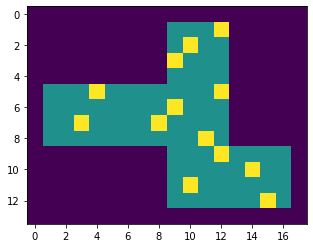

In [3]:
solve_puzzle_1('data/day22_example', draw=True)

126350

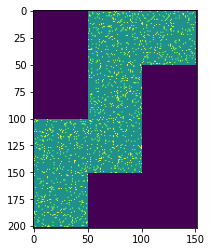

In [4]:
solve_puzzle_1('data/day22', draw=True)

##### Part 2:

It's the same problem than before but we have to change the `move()` function. In fact we have to change only the part where the new position after going outside the board is reached. 

We'll try to map all the positions outside the board with the corresponding correct position and new direction, assuming it's a cube

In [10]:
def move_cube(B, state, edges):
    """
    same than `move()` but the rules of edges are given by a edges, a mapping dictionary
    """
    
    x, y, d = state
        
    if d == 'R':
        if B[x, y+1] == 1:
            return x, y+1, d
        elif B[x, y+1] == 2:
            return x, y, d
        else:
            x_wrap, y_wrap, d_wrap = edges[state]
            if B[x_wrap, y_wrap] == 2:
                return x, y, d
            else:
                return x_wrap, y_wrap, d_wrap

    if d == 'L':
        if B[x, y-1] == 1:
            return x, y-1, d
        elif B[x, y-1] == 2:
            return x, y, d
        else:
            x_wrap, y_wrap, d_wrap = edges[state]
            if B[x_wrap, y_wrap] == 2:
                return x, y, d
            else:
                return x_wrap, y_wrap, d_wrap
    

    if d == 'D':
        if B[x+1, y] == 1:
            return x+1, y, d
        elif B[x+1, y] == 2:
            return x, y, d
        else:
            x_wrap, y_wrap, d_wrap = edges[state]
            if B[x_wrap, y_wrap] == 2:
                return x, y, d
            else:
                return x_wrap, y_wrap, d_wrap
    
    if d == 'U':
        if B[x-1, y] == 1:
            return x-1, y, d
        elif B[x-1, y] == 2:
            return x, y, d
        else:
            x_wrap, y_wrap, d_wrap = edges[state]
            if B[x_wrap, y_wrap] == 2:
                return x, y, d
            else:
                return x_wrap, y_wrap, d_wrap
            
    
            
def execute_step_cube(B, state, step, edges):
    
    if isinstance(step, int):
        for _ in range(step):
            state = move_cube(B, state, edges)
        return state
    
    else:
        x, y, d = state
        state = x, y, change_direction(d, step)
        return state

    
def solve_puzzle_2(puzzle_input, edges, draw=True):

    B, steps, state = parse_input(puzzle_input, draw)
    for step in steps:
        state = execute_step_cube(B, state, step, edges)
    return get_final_password(state)

In [15]:
s = 4 # side length
edge_list = [
{(1,2*s+1+i,'U'):(s+1,s-i,'D') for i in range(s)}        , # x0y23
{(1+i,3*s,'R'):(3*s-i,4*s,'L') for i in range(s)}        , # x01y3
    
{(1+s+i,3*s,'R'):(2*s+1,4*s-i,'D') for i in range(s)}    , # x12y3
{(2*s+1,4*s-i,'U'):(1+s+i,3*s,'L') for i in range(s)}    , # x2y34 
    
{(3*s-i,4*s,'R'):(1+i,3*s,'L') for i in range(s)}        , # x23y4 
{(3*s,3*s+1+i,'D'):(2*s-i,1,'R') for i in range(s)}      , # x3y34
    
{(3*s,2*s+1+i,'D'):(2*s,s-i,'U') for i in range(s)}      , # x3y23
{(2*s+1+i,2*s+1,'L'):(2*s,2*s-i,'U') for i in range(s)}  , # x23y2
    
{(2*s,2*s-i,'D'):(2*s+1+i,2*s+1,'R') for i in range(s)}  , # x2y12 
{(2*s,s-i,'D'):(3*s+1,2*s+1+i,'U') for i in range(s)}    , # x2y01  
    
{(2*s-i,1,'L'):(3*s,3*s+1+i,'U') for i in range(s)}      , # x12y0  
{(s+1,s-i,'U'):(1,2*s+1+i,'D') for i in range(s)}        , # x1y01   
    
{(s+1,s+1+i,'U'):(1+i,2*s+1,'R') for i in range(s)}      , # x1y12     
{(1+i,2*s+1,'L'):(s+1,s+1+i,'D') for i in range(s)}      , # x01y2   
]

edges_example = edge_list[0]
for d in edge_list:
    edges_example.update(d)
    
solve_puzzle_2('data/day22_example', edges_example, draw=False)

5031

In [16]:
s = 50 # side length
edge_list = [
{(1,s+1+i,'U'):(3*s+1+i,1,'R') for i in range(s)}        , # x0y12
{(3*s+1+i,1,'L'):(1,s+1+i,'D') for i in range(s)}        , # x34y0

{(1,2*s+1+i,'U'):(4*s,1+i,'U') for i in range(s)}        , # x0y23
{(4*s,1+i,'D'):(1,2*s+1+i,'D') for i in range(s)}        , # x4y01
    
{(1+i,3*s,'R'):(3*s-i,2*s,'L') for i in range(s)}        , # x01y3 
{(3*s-i,2*s,'R'):(1+i,3*s,'L') for i in range(s)}        , # x23y2
    
{(s,2*s+1+i,'D'):(s+1+i,2*s,'L') for i in range(s)}      , # x1y23
{(s+1+i,2*s,'R'):(s,2*s+1+i,'U') for i in range(s)}      , # x12y2
    
{(3*s,s+1+i,'D'):(3*s+1+i,s,'L') for i in range(s)}      , # x3y12
{(3*s+1+i,s,'R'):(3*s,s+1+i,'U') for i in range(s)}      , # x34y1
    
{(2*s+1+i,1,'L'):(s-i,s+1,'R') for i in range(s)}        , # x23y0 
{(s-i,s+1,'L'):(2*s+1+i,1,'R') for i in range(s)}        , # x01y1 

{(2*s+1,1+i,'U'):(s+1+i,s+1,'R') for i in range(s)}      , # x2y01
{(s+1+i,s+1,'L'):(2*s+1,1+i,'D') for i in range(s)}      , # x12y1
]

edges = edge_list[0]
for d in edge_list:
    edges.update(d)
    

solve_puzzle_2('data/day22', edges, draw=False)

129339

---

<a id='day23'><a/>

## --- Day 23: xxx ---

##### Part 1:

In [119]:
def parse_input(puzzle_input):
    """
    Returns a numpy array with 0s (empty ground) and 1s (elves)
    """
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    lines = [s.replace('.','0').replace('#','1') for s in lines]
    grid = np.array([list(s) for s in lines], dtype=int)
    return grid


def pad_is_needed(grid):
    """
    Check if there is an elf in the edge of the grid. If so pad is needed.
    """
    return grid[0].sum() + grid[-1].sum() + grid[:,0].sum() + grid[:,-1].sum() > 0


def is_alone(elve, grid):
    """
    Check if an elf have other elfs in the 8 surrounding positions
    """
    return grid[elve[0]-1:elve[0]+2, elve[1]-1:elve[1]+2].sum() == 1


def there_is_available_space(elve, grid, direction):
    """
    Given a direction, the function checks if an elf can move in that direction
    """
    if direction == 'N':
        return grid[elve[0]-1, elve[1]-1:elve[1]+2].sum() == 0 # N
    if direction == 'S':
        return grid[elve[0]+1, elve[1]-1:elve[1]+2].sum() == 0 # S
    if direction == 'E': 
        return grid[elve[0]-1:elve[0]+2, elve[1]+1].sum() == 0 # E
    if direction == 'W':
        return grid[elve[0]-1:elve[0]+2, elve[1]-1].sum() == 0 # W

    
def get_target_position(elve, grid, direction):
    """
    Returns the position where an elf would go given the current position and the direction where to move
    """
    if direction == 'N':
        return (elve[0]-1, elve[1]) # N
    if direction == 'S':
        return (elve[0]+1, elve[1]) # S
    if direction == 'E': 
        return (elve[0], elve[1]+1) # E
    if direction == 'W':
        return (elve[0], elve[1]-1) # W
    
    
def cut_grid(grid):
    """
    Eliminates edges rows or columns with all 0
    """
    x_min = np.where(grid==1)[0].min()
    x_max = np.where(grid==1)[0].max()
    y_min = np.where(grid==1)[1].min()
    y_max = np.where(grid==1)[1].max()

    grid = grid[x_min:x_max+1, y_min:y_max+1]
    return grid


def get_empty_ground(grid):
    """
    Sum all the empty ground positions given a grid
    """
    return -(grid - 1).sum()



def solve_puzzle_1(puzzle_input, draw=True):
    
    directions = 'NSWE'
    grid = parse_input(puzzle_input)

    for _ in range(10):

        if pad_is_needed(grid):
            grid = np.pad(grid, ((1,1),(1,1)), mode='constant')

        # identify coordinates of all elves:
        elves_coords = list(zip(list(np.where(grid==1)[0]), list(np.where(grid==1)[1])))
        elves = {}
        for elve in elves_coords:
            if not is_alone(elve, grid):
                for direction in directions:
                    if there_is_available_space(elve, grid, direction):
                        elves[elve] = get_target_position(elve, grid, direction)
                        break

        valid_targets = [target for target, count in Counter(elves.values()).items() if count == 1]

        for current_position, target_position in elves.items():
            if target_position in valid_targets:
                grid[current_position] = 0
                grid[target_position] = 1

        directions = directions[1:] + directions[0]

    grid = cut_grid(grid)
    if draw:
        plt.imshow(grid);
    return get_empty_ground(grid)

110

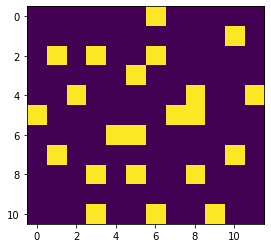

In [120]:
solve_puzzle_1('data/day23_example')

3906

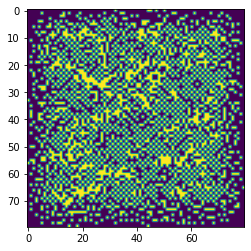

In [121]:
solve_puzzle_1('data/day23')

##### Part 2:

In [130]:
def solve_puzzle_2(puzzle_input, draw=True):
    
    directions = 'NSWE'
    grid = parse_input(puzzle_input)

    rounds = 0
    while True:
        
        rounds += 1
        if pad_is_needed(grid):
            grid = np.pad(grid, ((1,1),(1,1)), mode='constant')

        # identify coordinates of all elves:
        elves_coords = list(zip(list(np.where(grid==1)[0]), list(np.where(grid==1)[1])))
        elves = {}
        for elve in elves_coords:
            if not is_alone(elve, grid):
                for direction in directions:
                    if there_is_available_space(elve, grid, direction):
                        elves[elve] = get_target_position(elve, grid, direction)
                        break
        
        if len(elves) == 0:
            break
            
        valid_targets = [target for target, count in Counter(elves.values()).items() if count == 1]

        for current_position, target_position in elves.items():
            if target_position in valid_targets:
                grid[current_position] = 0
                grid[target_position] = 1

        directions = directions[1:] + directions[0]

    grid = cut_grid(grid)    
    if draw:
        plt.imshow(grid);
    return rounds

20

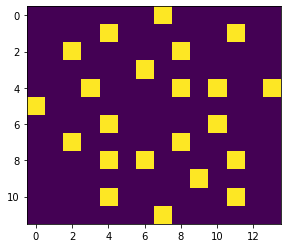

In [131]:
solve_puzzle_2('data/day23_example')

895

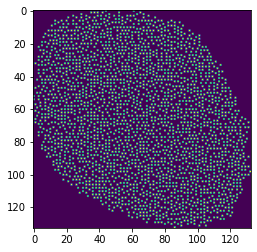

In [132]:
solve_puzzle_2('data/day23')

---

<a id='day24'><a/>

## --- Day 24: Blizzard Basin ---

##### Part 1:

Basic aproach with numpy arrays, structured functions and no optimizations. Works for the example **but is too slow** for the puzzle input.

In [3]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    lines = [list(s) for s in lines]
    lines = [l[1:-1] for l in lines][1:-1]
    lines = np.array(lines)
    
    blizzards = []
    directions = []

    for x, y in list(zip(list(np.where(lines != '.')[0]), list(np.where(lines != '.')[1]))):
        directions.append(lines[x,y])
        a = np.zeros(lines.shape, dtype=int)
        a[x,y] = 1
        blizzards.append(a)

    blizzards = np.array(blizzards)
    
    return blizzards, directions


def get_grid(blizzards, position):
    """
    Given a 3d numpy array representing the position of each blizzard,
    the function returns a 2d vision of the grid (valley) with the walls (-2),
    the positions occupied by blizzards (>=1) and the position of
    the expedition (-1) if ok, or -2 if it's overlapping with any blizzard
    """
    grid = blizzards.sum(axis=0)
    grid = np.pad(grid, 2, mode='constant', constant_values=-2)
    grid[1,2] = 0
    grid[-2, -3] = 0
    grid[position] = -1 if grid[position] == 0 else -2
    return grid


def compute_one_minute(blizzards, directions):
    
    def compute_one_minute_blizzard(a, direction):
        """
        a is a 2d numpy array with 0s everywhere
        except the position of the blizzard mark with a 1
        """

        x, y = np.where(a == 1)[0][0], np.where(a == 1)[1][0]
        a[x, y] = 0
        if direction == '>':
            a[x, (y+1)%a.shape[1]] = 1
        if direction == '<':
            a[x, (y-1)] = 1
        if direction == '^':
            a[(x-1), y] = 1
        if direction == 'v':
            a[(x+1)%a.shape[0], y] = 1
        return a
    
    for i, direction in enumerate(directions):
        blizzards[i,:,:] = compute_one_minute_blizzard(blizzards[i,:,:], direction)
    
    return blizzards


def get_valid_movements(grid, position):
    """
    Returns the available positions for the next move, including remaining in the same place
    """
    x, y = position
    movements = [(x-1,y), (x+1,y), (x, y-1), (x, y+1), (x, y)]
    return [movement for movement in movements if grid[movement] in [0, -1]]

In [4]:
# breadth-first search Algorithm

blizzards, directions = parse_input('data/day24_example')
initial_position = (1,2)
grid = get_grid(blizzards, initial_position)
finish_position = grid.shape[0]-2, grid.shape[1]-3


# state = (position, time, blizzards)
state = (initial_position, 0, blizzards)
queue = deque([state])

completed = False
while not completed:
    
    position, time, blizzards = queue.popleft()
    time += 1
    blizzards = blizzards.copy()
    blizzards = compute_one_minute(blizzards, directions)
    grid = get_grid(blizzards, position)
    
    for position in get_valid_movements(grid, position):
        
        if position == finish_position:
            print(time)
            completed = True
        
        queue.append((position, time, blizzards))


18


Let's see an optimized version taken from the **hyper-neutrino** solution. The keys to solve the puzzle are:
- Also use the BFS algorithm
- It's not necessary to track all the blizzard positions along time. You can predict if a position will be available or not at any time backtracking from the position `time` times in each direction looking for the blizzard that may occupy that place.
- There's an optimization consisting in detect repeating scenarios already seen before.

In [2]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        lines = file.read().splitlines()

    blizzards = tuple(set() for _ in range(4))

    for r, line in enumerate(lines[1:]):
        for c, item in enumerate(line[1:]):
            if item in "<>^v":
                blizzards["<>^v".find(item)].add((r, c))

    return r, c, blizzards



def get_shortest_time(start, target, r, c, initial_time, blizzards):
    
    # already seen scenarios
    seen = set() 

    # next number determines the pattern cycle in order to detect identical scenarios.
    # This is key to have performance in the large puzzle
    cycle = r * c // math.gcd(r, c)

    # state is completely defined by (x, y, time)
    queue = deque([(initial_time, start[0], start[1])])
    
    while queue:

        time, cr, cc = queue.popleft()
        time += 1

        # checking next available positions:
        for dr, dc in ((0,1), (0,-1), (-1,0), (1,0), (0,0)):  # 4 neighbours + itself
            nr = cr + dr
            nc = cc + dc

            # termination condition
            if (nr, nc) == target:
                return time - initial_time

            # check if next row and column are inside the board
            if (nr < 0 or nc < 0 or nr >= r or nc >= c) and not (nr, nc) == (start[0], start[1]):
                continue

            # check if next row and column are available to jump in:
            fail = False
            if (nr, nc) not in [(0,-1), (r,c-1)]:
                for i, tr, tc in ((0,0,-1), (1,0,1), (2,-1,0), (3,1,0)):
                    if ((nr - tr * time) % r, (nc - tc * time) % c) in blizzards[i]:
                        fail = True
                        break
            if not fail:
                # this else block only run if the for loop ends without break
                key = (nr, nc, time % cycle)
                if key in seen:
                    continue

                seen.add(key)
                queue.append((time, nr, nc))
    
    
def solve_puzzle_1(puzzle_input):
    
    r, c, blizzards = parse_input(puzzle_input)
    
    start = (0, -1)
    target = (r, c-1)
    initial_time = 0
    
    time = get_shortest_time(start, target, r, c, initial_time, blizzards)
    return time

In [3]:
solve_puzzle_1('data/day24_example')

18

In [4]:
solve_puzzle_1('data/day24')

301

##### Part 2:

Having code Part 1 properly, with the `start_position`, `end_position` and the `initial_time` params, the part 2 is straight forward, computing the same problem three times in serie

In [5]:
def solve_puzzle_2(puzzle_input):
    
    r, c, blizzards = parse_input(puzzle_input)
    time_1 = get_shortest_time((0, -1), (r, c-1), r, c, 0, blizzards)
    time_2 = get_shortest_time((r, c-1), (0, -1), r, c, time_1, blizzards)
    time_3 = get_shortest_time((0, -1), (r, c-1), r, c, time_1 + time_2, blizzards)
    time = time_1 + time_2 + time_3
    
    return time

In [6]:
solve_puzzle_2('data/day24_example')

54

In [7]:
solve_puzzle_2('data/day24')

859

---

<a id='day25'><a/>

## --- Day 25: Full of Hot Air ---

##### Part 1:

In [9]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        snafu_numbers = file.read().splitlines()
    return snafu_numbers


def snafu_to_decimal(snafu_number, snafu_codes):
    
    exponents_of_5 = np.array([5**i for i in range(20)][::-1])
    
    decimal_number = np.array([snafu_codes[code] for code in list(snafu_number)])
    decimal_number = np.pad(decimal_number, (20-len(decimal_number),0), mode='constant')
    decimal_number = (decimal_number * exponents_of_5).sum()
    return decimal_number

def decimal_to_snafu(decimal_number, snafu_codes):

    exponents_of_5 = np.array([5**i for i in range(20)][::-1])
    choices = list(range(-2, 3))
    target = decimal_number
    snafu_number = []
    for i in range(exponents_of_5.shape[0]):
        factor = exponents_of_5[i]
        max_reminder = (exponents_of_5[i+1:] * 2).sum()
        snafu_digit = choices[np.where(abs(np.array([factor * i for i in choices]) - target) <= max_reminder)[0][0]]
        snafu_number.append(snafu_digit)
        target = target - snafu_digit * factor

    for i in range(exponents_of_5.shape[0]):
        if snafu_number[0] == 0:
            snafu_number.remove(0)
        else:
            break

    reversed_snafu_codes = {value: key for key, value in snafu_codes.items()}
    return "".join([reversed_snafu_codes[snafu_digit] for snafu_digit in snafu_number])


def solve_puzzle_1(puzzle_input):
    
    snafu_codes = {
        '2': 2,
        '1': 1,
        '0': 0,
        '-': -1,
        '=': -2,
    }
    
    snafu_numbers = parse_input(puzzle_input)
    decimal_number = sum([snafu_to_decimal(snafu_number, snafu_codes) for snafu_number in snafu_numbers])
    snafu_number = decimal_to_snafu(decimal_number, snafu_codes)
    return snafu_number

In [10]:
solve_puzzle_1('data/day25_example')

'2=-1=0'

In [12]:
solve_puzzle_1('data/day25')

'2-00=12=21-0=01--000'

<a id='recap'><a/>

## --- Recap ---

2022 has been a great edition of Advent of Code.  

As always thanks to [Eric Wastl](http://was.tl/) for his creativity and talent.  

Thanks to [hyper-neutrino](https://www.youtube.com/@hyper-neutrino) for posting well explained solutions for all the puzzles. Without his help, puzzles 16, 19, 22 and 24 would have been impossible for me to find a solution. And his explanations are a huge source of inspiration and learning of techniques.